In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('feature_eng.csv')

In [3]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,ratecode_special_rates,pickup_hour,pickup_day,pickup_month,pickup_day_of_week,is_peak_hour,is_weekend,same_zone,trip_type,trip_duration
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,0.422371,238,239,1.0,0.237510,3.0,0.5,...,False,0,1,1,2,0,0,0,inter-zone,0.333542
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,0.422371,239,238,1.0,0.277161,3.0,0.5,...,False,0,1,1,2,0,0,0,inter-zone,0.333857
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.322204,238,238,1.0,0.237510,3.0,0.5,...,False,0,1,1,2,0,0,1,intra-zone,0.333709
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.355593,238,151,1.0,0.217684,0.5,0.5,...,False,0,1,1,2,0,0,0,inter-zone,0.333548
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.222037,193,193,2.0,0.138382,0.5,0.5,...,False,0,1,1,2,0,0,1,intra-zone,0.333242


---

## Initial Data Overview ##

In [4]:
df.info

<bound method DataFrame.info of         tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0        2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1        2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2        2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3        2020-01-01 00:55:23   2020-01-01 01:00:14              1.0   
4        2020-01-01 00:01:58   2020-01-01 00:04:16              1.0   
...                      ...                   ...              ...   
5361464  2020-01-31 22:18:00   2020-01-31 22:41:00              1.0   
5361465  2020-01-31 22:21:13   2020-01-31 22:53:56              1.0   
5361466  2020-01-31 22:34:00   2020-01-31 22:48:00              1.0   
5361467  2020-01-31 22:13:00   2020-01-31 22:23:00              1.0   
5361468  2020-01-31 22:51:00   2020-01-31 23:22:00              1.0   

         trip_distance  PULocationID  DOLocationID  payment_type  fare_amount  \
0             0.422371           2

In [5]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [6]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
df.dtypes

tpep_pickup_datetime        datetime64[ns]
tpep_dropoff_datetime       datetime64[ns]
passenger_count                    float64
trip_distance                      float64
PULocationID                         int64
DOLocationID                         int64
payment_type                       float64
fare_amount                        float64
extra                              float64
mta_tax                            float64
tip_amount                         float64
tolls_amount                       float64
improvement_surcharge              float64
congestion_surcharge               float64
tip_percentage                     float64
fare_per_mile                      float64
avg_fare_per_pulocation            float64
avg_fare_per_dolocation            float64
ratecode_negotiated_fare              bool
ratecode_group_ride                   bool
ratecode_shared_ride                  bool
ratecode_other                        bool
ratecode_special_rates                bool
pickup_hour

#### Getting the Statistical Summary of Numeric Data ####

In [8]:
df[['fare_amount','trip_distance','fare_per_mile','trip_duration']].describe()

,fare_amount,trip_distance,fare_per_mile,trip_duration
count,5.361469e+06,5.361469e+06,5.361469e+06,5.361469e+06
mean,3.511416e-01,4.951749e-01,2.382012e-01,3.345186e-01
std,1.483618e-01,1.641020e-01,1.782577e-01,7.213820e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.375099e-01,3.722871e-01,1.145801e-01,3.336745e-01
50%,3.168121e-01,4.557596e-01,1.984142e-01,3.340732e-01
75%,4.357653e-01,5.859766e-01,3.120478e-01,3.346080e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


#### Unique Value Counts of Categorical Data ####

In [9]:
categorical_columns = [
    'PULocationID', 'DOLocationID', 'payment_type', 
    'ratecode_negotiated_fare', 'ratecode_group_ride', 
    'ratecode_shared_ride', 'ratecode_other', 'ratecode_special_rates',
    'trip_type', 'pickup_hour', 'pickup_day', 'pickup_month', 
    'pickup_day_of_week', 'is_peak_hour', 'is_weekend', 'same_zone'
]

# Count unique values in each categorical column
unique_values = {col: df[col].nunique() for col in categorical_columns}
unique_values

{'PULocationID': 253,
 'DOLocationID': 255,
 'payment_type': 2,
 'ratecode_negotiated_fare': 2,
 'ratecode_group_ride': 2,
 'ratecode_shared_ride': 2,
 'ratecode_other': 2,
 'ratecode_special_rates': 2,
 'trip_type': 2,
 'pickup_hour': 24,
 'pickup_day': 31,
 'pickup_month': 8,
 'pickup_day_of_week': 7,
 'is_peak_hour': 2,
 'is_weekend': 2,
 'same_zone': 2}

#### Top Categories ####

In [10]:
def top_categories(df, col, n=5):
    return df[col].value_counts().head(n)

# Apply the function to each categorical column
top_categories_info = {col: top_categories(df, col) for col in categorical_columns}
top_categories_info

{'PULocationID': PULocationID
 237    277054
 236    255577
 161    253238
 162    210412
 186    207887
 Name: count, dtype: int64,
 'DOLocationID': DOLocationID
 236    274968
 237    253683
 161    232289
 170    182241
 162    176649
 Name: count, dtype: int64,
 'payment_type': payment_type
 1.0    4008564
 2.0    1352905
 Name: count, dtype: int64,
 'ratecode_negotiated_fare': ratecode_negotiated_fare
 False    5361420
 True          49
 Name: count, dtype: int64,
 'ratecode_group_ride': ratecode_group_ride
 False    5360610
 True         859
 Name: count, dtype: int64,
 'ratecode_shared_ride': ratecode_shared_ride
 False    5361317
 True         152
 Name: count, dtype: int64,
 'ratecode_other': ratecode_other
 False    5355551
 True        5918
 Name: count, dtype: int64,
 'ratecode_special_rates': ratecode_special_rates
 False    5361450
 True          19
 Name: count, dtype: int64,
 'trip_type': trip_type
 inter-zone    5012039
 intra-zone     349430
 Name: count, dtype: int64

---

---

## Key Observations from Data Analysis

### Location Patterns
- Pickups and drop-offs are concentrated in a few key areas
- PULocationID 237 and DOLocationID 236 are the busiest

### Payment Methods
- Two main types, with type 1 being most common
- Suggests a preference for a particular payment method (e.g., cash or card)

### Special Rate Codes
- Special fare conditions (like negotiated fares or group rides) are rare

### Trip Characteristics
- Inter-zone trips significantly outnumber intra-zone trips
- Indicates people often travel between different city zones

### Time-Based Patterns
- Busiest pickup times: Late afternoon to early evening, peaking at 6 PM
- Certain days of the month (17th and 30th) show higher activity
- Weekdays, especially mid-week, are busier than weekends

### Peak Hours and Day Type
- Most trips occur during non-peak hours
- Weekday trips are more common than weekend trips
- Suggests a high volume of regular commuter travel

These observations provide insights into travel patterns, busy locations, and customer preferences, which can be valuable for service optimization and planning.

---

## Univariate Analysis ##

In [11]:
import seaborn as sns

In [12]:
numerical_cols = ['fare_amount','trip_distance','fare_per_mile','tip_percentage','trip_duration'] 

In [13]:
df[numerical_cols].head()

,fare_amount,trip_distance,fare_per_mile,tip_percentage,trip_duration
0,0.237510,0.422371,0.133690,0.000010,0.333542
1,0.277161,0.422371,0.205882,0.000009,0.333857
2,0.237510,0.322204,0.566845,0.000007,0.333709
3,0.217684,0.355593,0.296123,0.000010,0.333548
4,0.138382,0.222037,0.261823,0.000000,0.333242


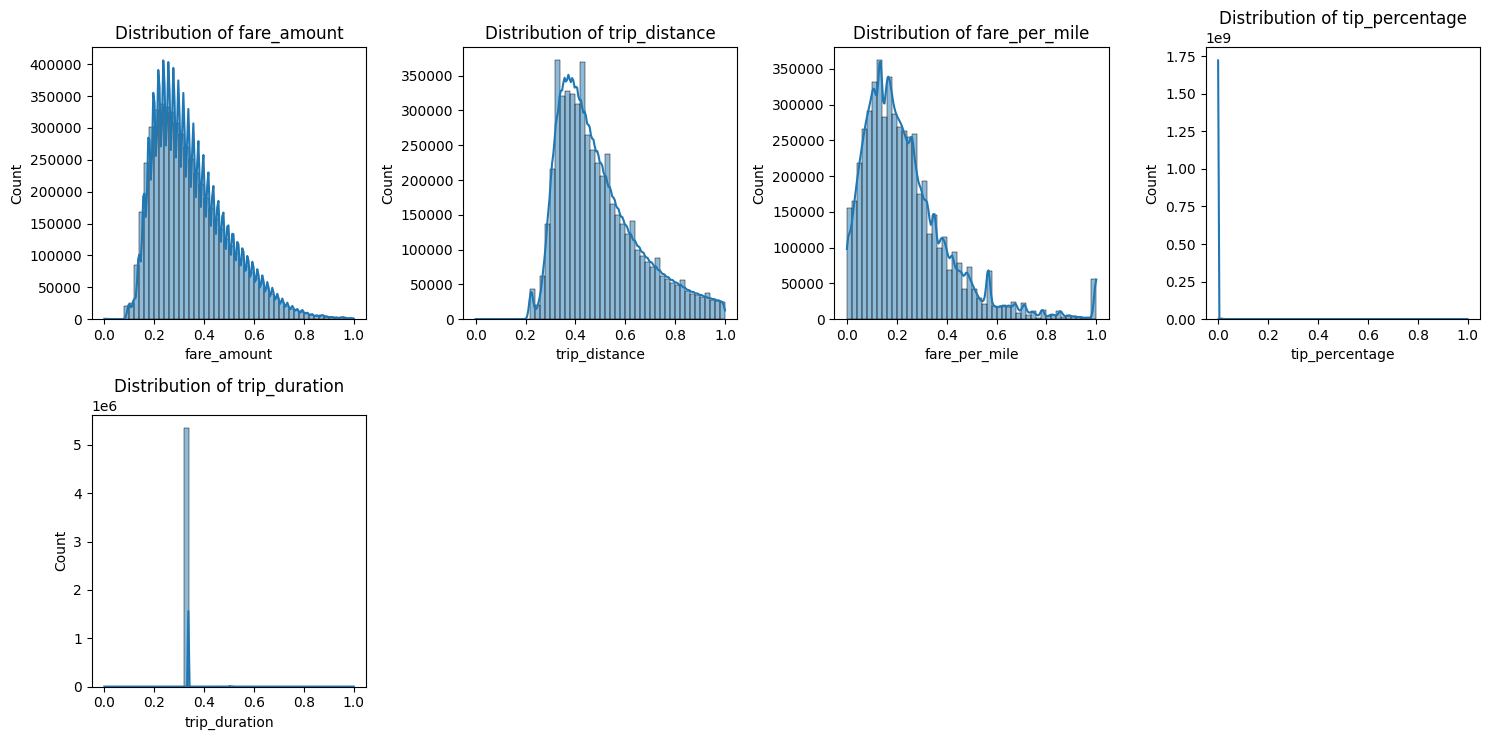

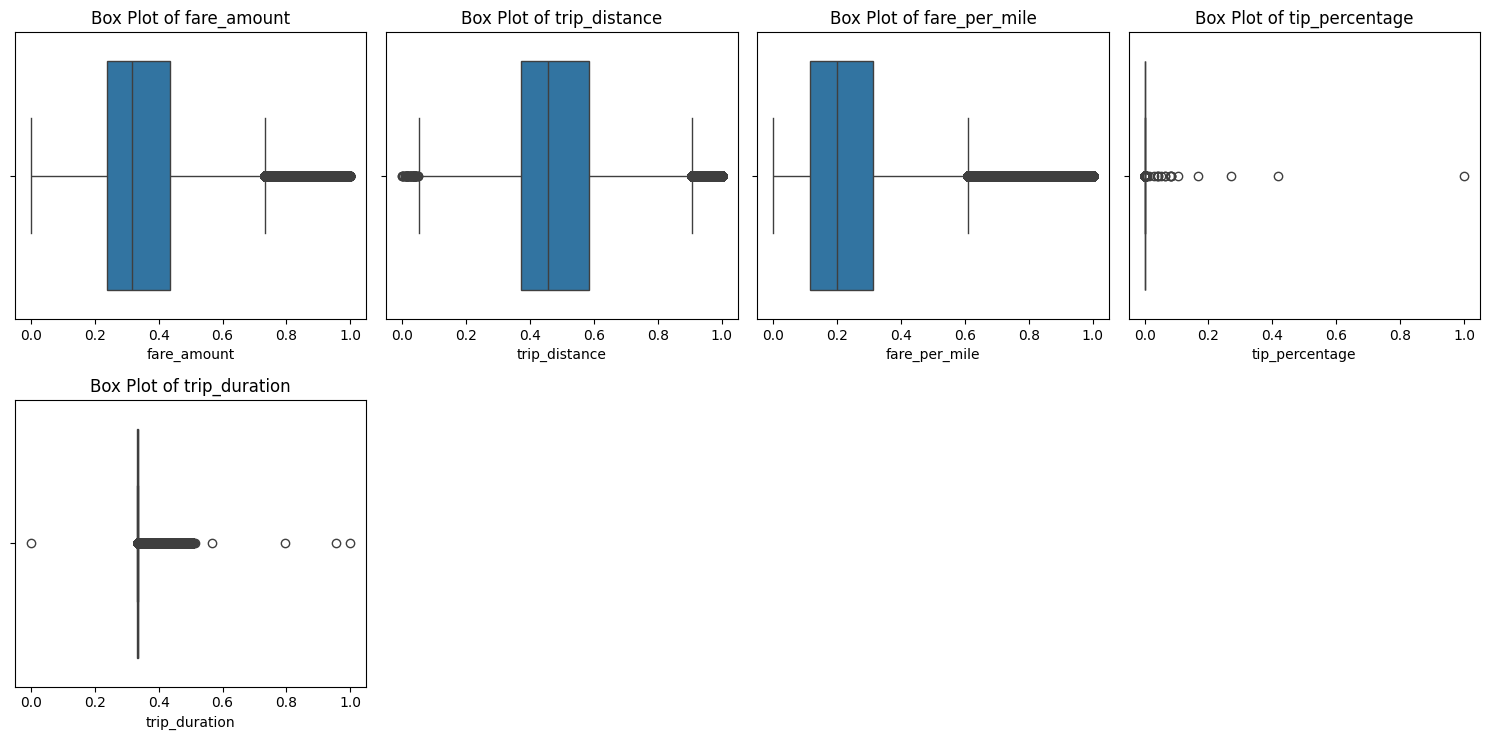

Skewness of Numerical Features:
fare_amount          0.914585
trip_distance        0.950998
fare_per_mile        1.629640
tip_percentage    1662.441034
trip_duration       23.177245
dtype: float64


In [14]:
#Histogram
plt.figure(figsize=(15, 7.5))  

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#BoxPlot
plt.figure(figsize=(15, 7.5)) 

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x=df[col])  
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Calculate skewness for numerical features
skewness = df[numerical_cols].skew()
print("Skewness of Numerical Features:")
print(skewness)

#### Identifying the Skewness and Dealing with Outliers ####

In [15]:
# Check for zero tip percentages
zero_tips = df[df['tip_percentage'] == 0]
zero_tips_count = zero_tips.shape[0]

In [16]:
# Check for unusually high tip percentages (e.g., above 100%)
high_tips = df[df['tip_percentage'] > 1]
high_tips_count = high_tips.shape[0]

In [17]:
# Check the distribution of payment types for zero tips
payment_type_zero_tips = zero_tips['payment_type'].value_counts()
# Summary statistics for trip_duration
trip_duration_stats = df['trip_duration'].describe()

In [18]:
# Check for abnormally long or short trip durations
short_durations = df[df['trip_duration'] < 60]  # Example threshold for short trips
long_durations = df[df['trip_duration'] > 3600]  # Example threshold for long trips

In [19]:
short_durations_count = short_durations.shape[0]
long_durations_count = long_durations.shape[0]

In [20]:
print(f'Zero tips count {zero_tips_count}')
print(f"High tips count {high_tips_count}")
print(f'Payment type zero tips: \n {payment_type_zero_tips}')
print(f'Trip duration stats {trip_duration_stats}')
print(f'Short Durations {short_durations_count}')
print(f'Long Durations {long_durations_count}')

Zero tips count 1472445
High tips count 0
Payment type zero tips: 
 payment_type
2.0    1352787
1.0     119658
Name: count, dtype: int64
Trip duration stats count    5.361469e+06
mean     3.345186e-01
std      7.213820e-03
min      0.000000e+00
25%      3.336745e-01
50%      3.340732e-01
75%      3.346080e-01
max      1.000000e+00
Name: trip_duration, dtype: float64
Short Durations 5361469
Long Durations 0


In [21]:
df['trip_duration'].value_counts()

trip_duration
0.333807    7732
0.333747    7633
0.333687    7629
0.333707    7533
0.333727    7423
            ... 
0.450079       1
0.453274       1
0.449973       1
0.338558       1
0.339456       1
Name: count, Length: 7252, dtype: int64

In [22]:
df['tip_percentage'].value_counts()

tip_percentage
0.000000    1472445
0.000008      63990
0.000010      52738
0.000013      49937
0.000013      48838
             ...   
0.000014          1
0.000068          1
0.000002          1
0.000028          1
0.000004          1
Name: count, Length: 8184, dtype: int64

---

## Changing and reverting the two columns to improve analysis and Visualization ##

## Reverting Normalization and Handling Data Distribution

To improve our analysis, we're reverting the normalization of `tip_percentage` and `trip_duration` and addressing outliers and skewness. Here's our approach:

### 1. Reverting Normalization

We're converting our normalized values back to their original scale:

- For `tip_percentage`: 
  - Given range is 2400000.0 and 0 is minimum
- For `trip_duration`: 
  - Given max is 8525.116666666667 and -2770.366666666667 is minimum

Formula used: original_value = normalized_value × (max - min) + min

### 2. Handling Outliers

After reverting normalization, we'll:
- Identify outliers using statistical methods (e.g., IQR or Z-score)
- Decide whether to remove, cap, or transform these extreme values

### 3. Addressing Skewness

If the data shows significant skewness, we'll apply transformations such as:
- Logarithmic
- Square root
- Box-cox

These steps will help us work with more interpretable data while managing extreme values and non-normal distributions. This process ensures our subsequent analyses and models are based on well-prepared, meaningful data.

In [23]:
# Reverting normalization for trip_duration and tip_percentage
trip_duration_max = 8525.1167
trip_duration_min = -2770.3667
tip_percentage_max = 2400000.0
tip_percentage_min = 0.0

df['trip_duration'] = df['trip_duration'] * (trip_duration_max - trip_duration_min) + trip_duration_min
df['tip_percentage'] = df['tip_percentage'] * (tip_percentage_max - tip_percentage_min) + tip_percentage_min

# Handling outliers and data issues

# Remove negative durations or set them to a minimum acceptable value (e.g., 0)
df['trip_duration'] = df['trip_duration'].apply(lambda x: max(x, 0))

# Cap extreme tip percentages, e.g., limit to 100% as a maximum reasonable tip
df['tip_percentage'] = df['tip_percentage'].apply(lambda x: min(x, 100))

In [24]:
df['trip_duration'].value_counts()

trip_duration
1000.141806    7732
999.463014     7633
998.784222     7629
999.010486     7533
999.236750     7423
               ... 
2313.491179       1
2349.580286       1
2312.291980       1
1053.811626       1
1063.948253       1
Name: count, Length: 7252, dtype: int64

In [25]:
df['tip_percentage'].value_counts()

tip_percentage
0.000000     1472445
20.000000      63990
25.000000      52738
31.000000      49937
30.153846      48838
              ...   
24.846154          1
60.625000          1
77.214286          1
27.419355          1
8.873114           1
Name: count, Length: 7024, dtype: int64

In [26]:
df['payment_type'].value_counts()

payment_type
1.0    4008564
2.0    1352905
Name: count, dtype: int64

In [27]:
#Seperating the payment type just to analyse how the Zero tips are spreading
one = df['payment_type']
two = df['payment_type']

In [28]:
df_one = one[one == 1]

In [29]:
df_one.value_counts()

payment_type
1.0    4008564
Name: count, dtype: int64

In [30]:
df_two = two[two == 2]

In [31]:
df_two.value_counts()

payment_type
2.0    1352905
Name: count, dtype: int64

## Analyzing Tip Distribution Across Payment Types

To visualize the distribution of tip percentages for different payment types, with a focus on zero tips, we're using a combination of plots:

1. **Box Plots**: 
   - Show overall distribution and outliers
   - Easy comparison between payment types

2. **Violin Plots**: 
   - Provide detailed distribution shape
   - Highlight concentrations, including at zero

3. **Cumulative Distribution Function (CDF) plot**: 
   - Plot the CDF for both payment types on the same graph.
   - This will clearly show the proportion of zero tips (where the curve starts rising from zero on the y-axis).

4. **Bar Plot for Zero Tip Proportion**: 
   - Directly compare proportion of zero tips between payment types

This multi-plot approach offers a comprehensive view of tip distribution:
- Reveals overall patterns and differences between payment types
- Highlights the frequency and proportion of zero tips
- Shows the shape and spread of tip percentages

By combining these visualizations, we can gain insights into tipping behavior, identify any significant differences between payment types, and understand the prevalence of zero-tip rides.

In [32]:
import numpy as np

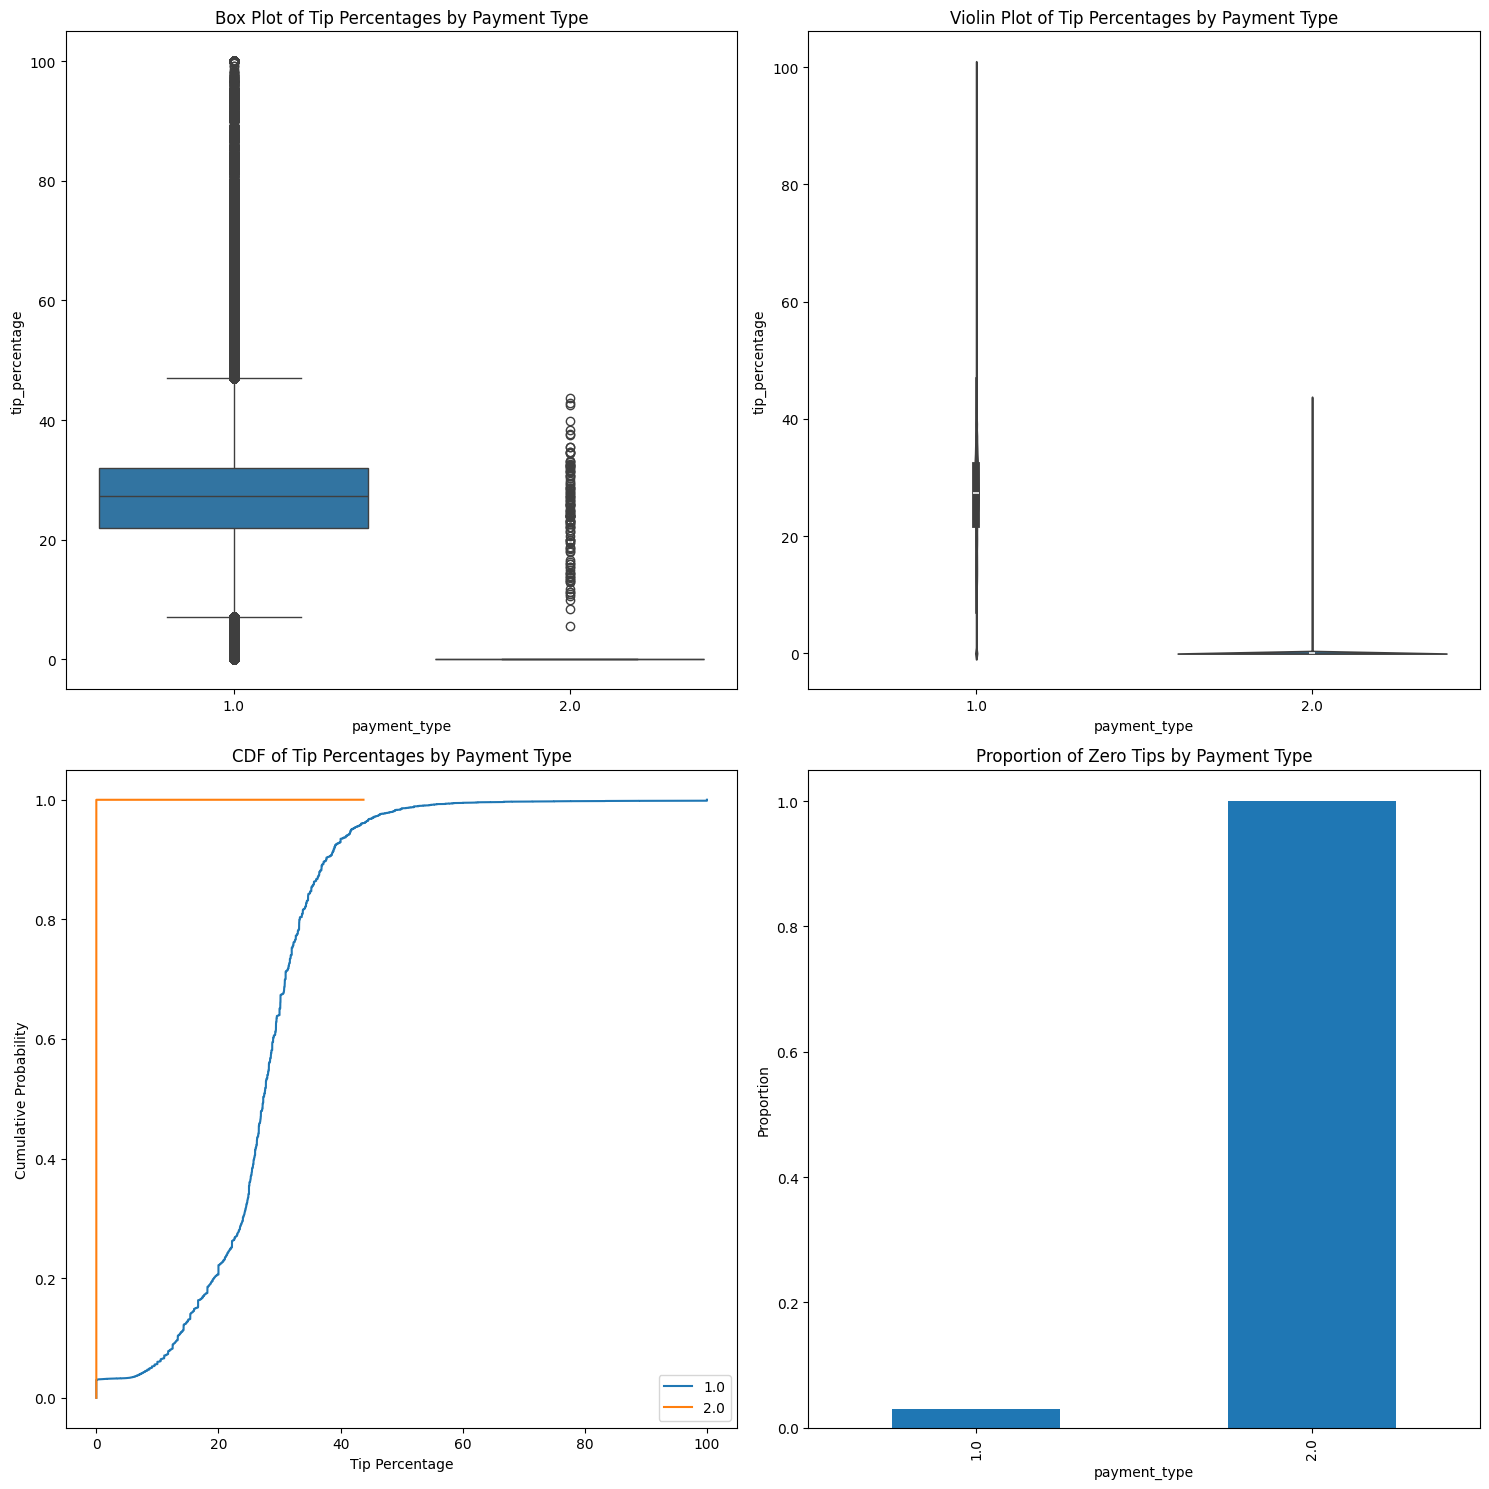

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

#Plotting BOX plots
sns.boxplot(x='payment_type', y='tip_percentage', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Tip Percentages by Payment Type')

#Plotting Violin plots
sns.violinplot(x='payment_type', y='tip_percentage', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot of Tip Percentages by Payment Type')

#Plotting CDF 
for payment_type in df['payment_type'].unique():
    data = df[df['payment_type'] == payment_type]['tip_percentage']
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    axes[1, 0].plot(x, y, label=payment_type)

axes[1, 0].set_title('CDF of Tip Percentages by Payment Type')
axes[1, 0].set_xlabel('Tip Percentage')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].legend()

#Plotting BAR plots
zero_tip_prop = df.groupby('payment_type')['tip_percentage'].apply(lambda x: (x == 0).mean())
zero_tip_prop.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Proportion of Zero Tips by Payment Type')
axes[1, 1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [34]:
from scipy import stats

In [35]:
df1 = df

In [36]:
df1.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,...,ratecode_special_rates,pickup_hour,pickup_day,pickup_month,pickup_day_of_week,is_peak_hour,is_weekend,same_zone,trip_type,trip_duration
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,0.422371,238,239,1.0,0.237510,3.0,0.5,...,False,0,1,1,2,0,0,0,inter-zone,997.155121
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,0.422371,239,238,1.0,0.277161,3.0,0.5,...,False,0,1,1,2,0,0,0,inter-zone,1000.707466
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.322204,238,238,1.0,0.237510,3.0,0.5,...,False,0,1,1,2,0,0,1,intra-zone,999.033112
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.355593,238,151,1.0,0.217684,0.5,0.5,...,False,0,1,1,2,0,0,0,inter-zone,997.223000
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.222037,193,193,2.0,0.138382,0.5,0.5,...,False,0,1,1,2,0,0,1,intra-zone,993.761161


In [37]:
df1.dtypes

tpep_pickup_datetime        datetime64[ns]
tpep_dropoff_datetime       datetime64[ns]
passenger_count                    float64
trip_distance                      float64
PULocationID                         int64
DOLocationID                         int64
payment_type                       float64
fare_amount                        float64
extra                              float64
mta_tax                            float64
tip_amount                         float64
tolls_amount                       float64
improvement_surcharge              float64
congestion_surcharge               float64
tip_percentage                     float64
fare_per_mile                      float64
avg_fare_per_pulocation            float64
avg_fare_per_dolocation            float64
ratecode_negotiated_fare              bool
ratecode_group_ride                   bool
ratecode_shared_ride                  bool
ratecode_other                        bool
ratecode_special_rates                bool
pickup_hour

#### Checking the correlation between tip percentage, trip duration and payment type ####

In [38]:
# Convert payment_type to categorical
df1['payment_type'] = df1['payment_type'].astype('category')

In [39]:
df1['payment_type'].value_counts()

payment_type
1.0    4008564
2.0    1352905
Name: count, dtype: int64

In [40]:
# Calculate correlations
corr_matrix = df1[['payment_type', 'tip_percentage', 'trip_duration']].corr()

In [41]:
corr_matrix

,payment_type,tip_percentage,trip_duration
payment_type,1.000000,-0.786540,0.001417
tip_percentage,-0.786540,1.000000,-0.031644
trip_duration,0.001417,-0.031644,1.000000


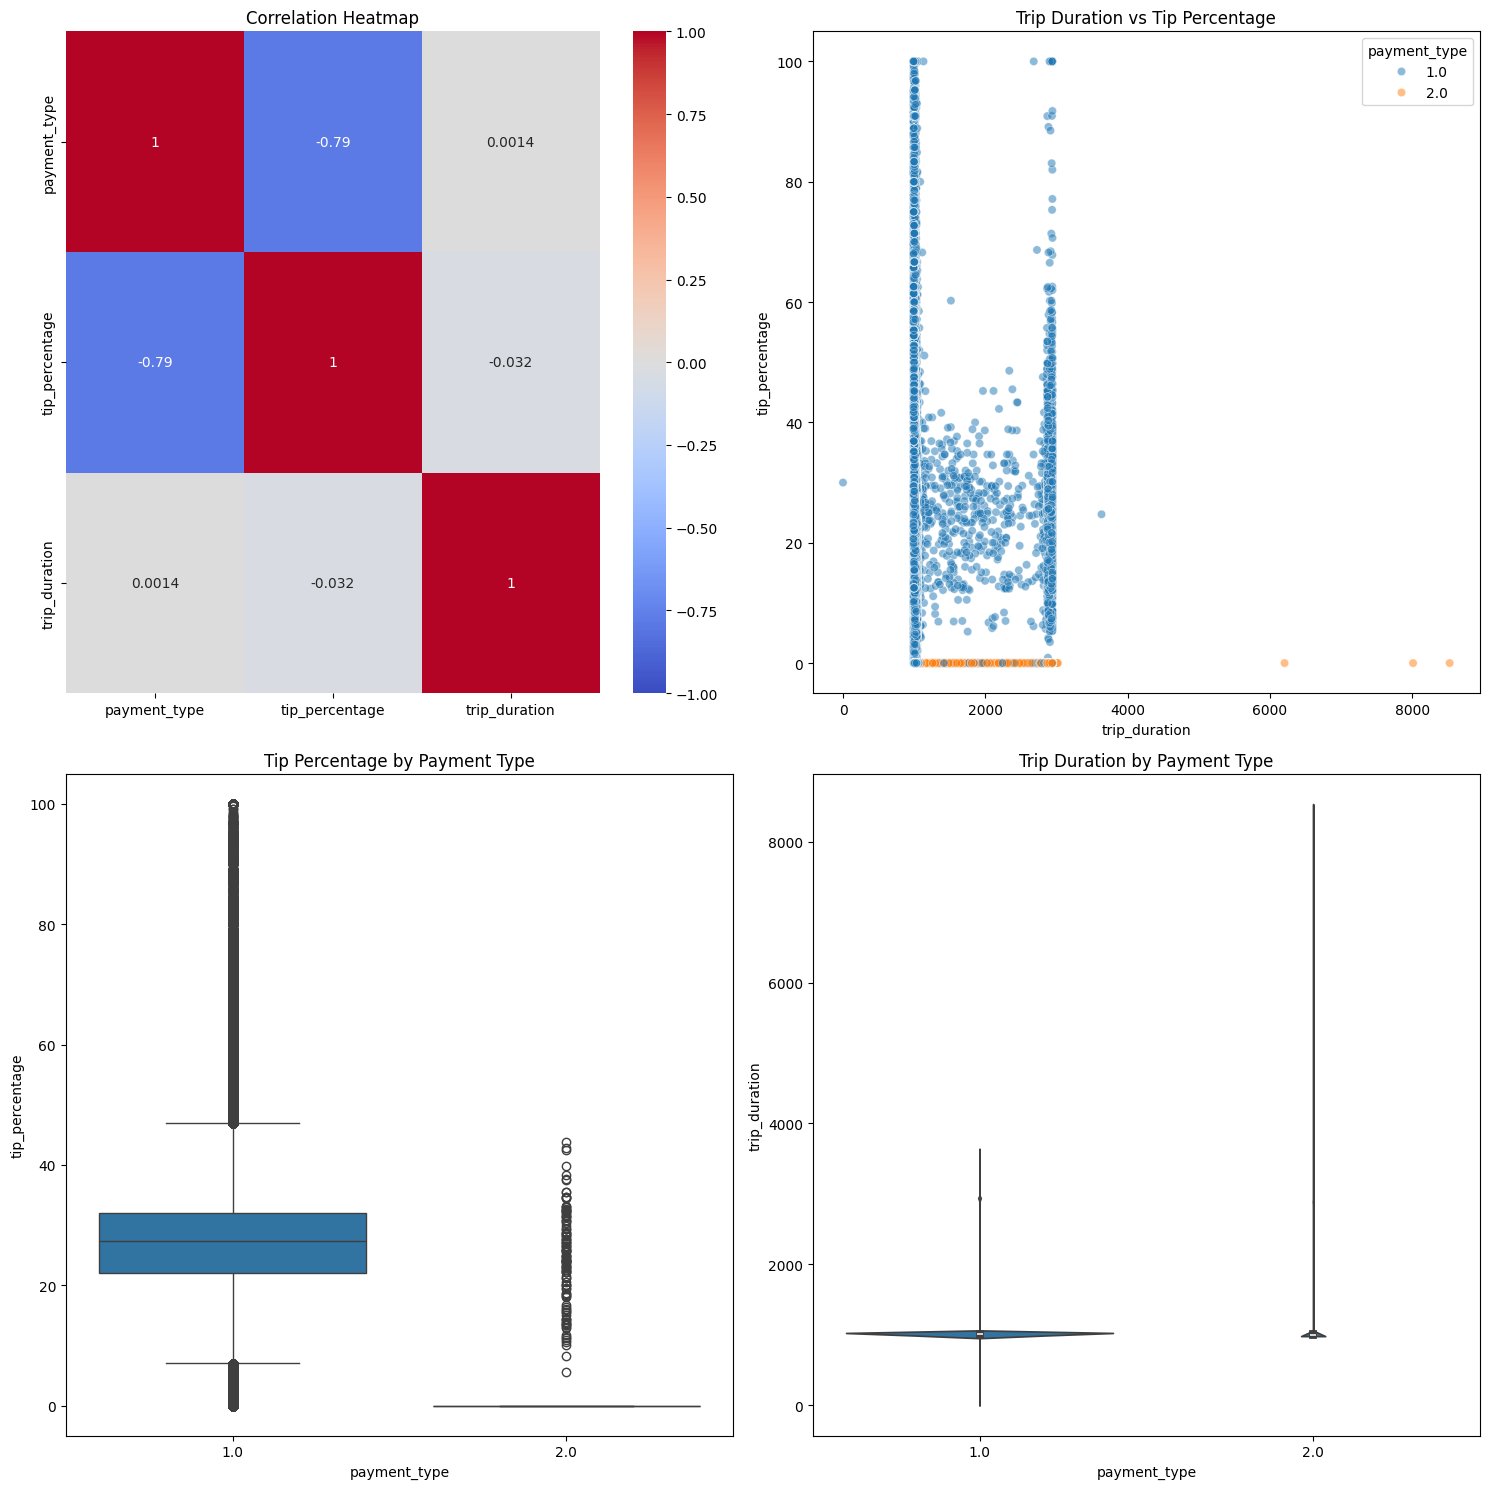

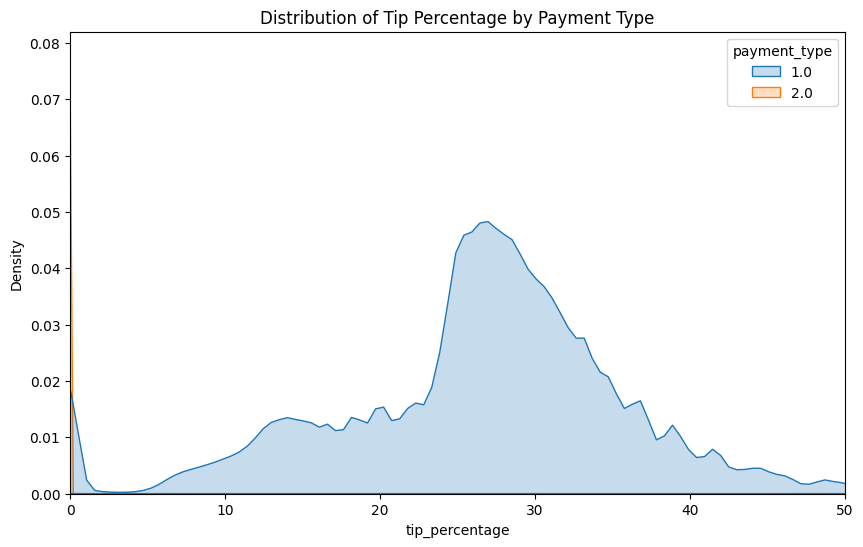

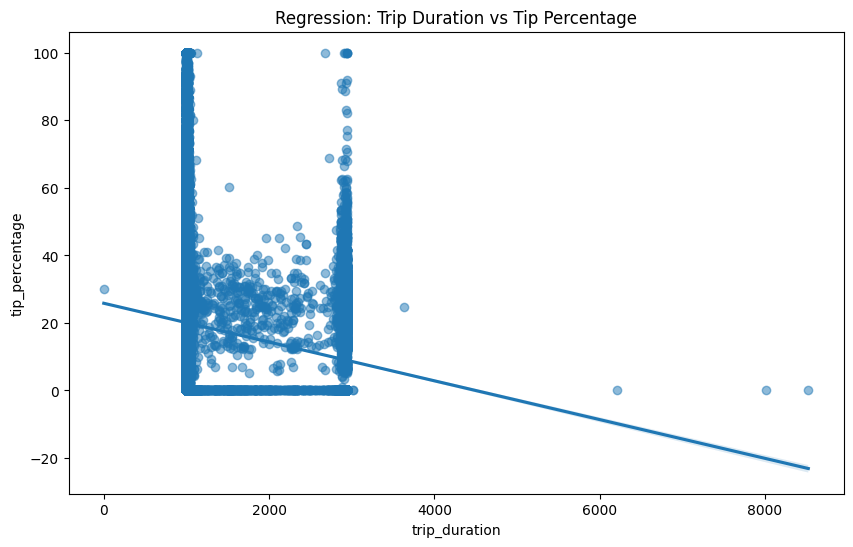

T-test results: t-statistic = 2949.1572650452977, p-value = 0.0
Correlation between trip duration and tip percentage: r = -0.03164382236482646, p-value = 0.0


In [42]:
plt.figure(figsize=(15, 15))

# 3.1 Correlation Heatmap
plt.subplot(221)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')

# 3.2 Scatter plot: Trip Duration vs Tip Percentage
plt.subplot(222)
sns.scatterplot(data=df1, x='trip_duration', y='tip_percentage', hue='payment_type', alpha=0.5)
plt.title('Trip Duration vs Tip Percentage')

# 3.3 Box plot: Tip Percentage by Payment Type
plt.subplot(223)
sns.boxplot(data=df1, x='payment_type', y='tip_percentage')
plt.title('Tip Percentage by Payment Type')

# 3.4 Violin plot: Trip Duration by Payment Type
plt.subplot(224)
sns.violinplot(data=df1, x='payment_type', y='trip_duration')
plt.title('Trip Duration by Payment Type')

plt.tight_layout()
plt.show()

# 3.5 Additional Analysis: KDE plot for Tip Percentage
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df1, x='tip_percentage', hue='payment_type', fill=True)
plt.title('Distribution of Tip Percentage by Payment Type')
plt.xlim(0, 50)  # Adjust as needed
plt.show()

# 3.6 Regression plot: Trip Duration vs Tip Percentage
plt.figure(figsize=(10, 6))
sns.regplot(data=df1, x='trip_duration', y='tip_percentage', scatter_kws={'alpha':0.5})
plt.title('Regression: Trip Duration vs Tip Percentage')
plt.show()

# 4. Statistical Tests
# T-test for tip percentage between payment types
type1 = df1[df1['payment_type'] == 1]['tip_percentage']
type2 = df1[df1['payment_type'] == 2]['tip_percentage']
t_stat, p_value = stats.ttest_ind(type1, type2)
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# Correlation test between trip duration and tip percentage
corr, p_value = stats.pearsonr(df1['trip_duration'], df1['tip_percentage'])
print(f"Correlation between trip duration and tip percentage: r = {corr}, p-value = {p_value}")

---

# Key Insights from Taxi Trip Data Analysis

## Payment Type and Tipping Behavior
Here we have assumed that 1 - could be Cash or Credit and 2 could be any form of Digital Payment
- Strong negative correlation (-0.79) between payment type and tip percentage
- Cash or Credit payments (type 1) generally result in higher and more variable tips
- Digital payments (type 2) show consistently lower tip percentages

## Trip Duration and Tipping

- Very weak negative correlation (-0.032) between trip duration and tip percentage
- Longer trips tend to have slightly lower tip percentages, but the effect is minimal

## Payment Type Distribution

- Cash or Credit payments show a broader range of tip percentages, peaking around 25-30%
- Digital payments cluster near 0% for tip percentages

## Statistical Significance

- T-test confirms a significant difference in tip percentages between payment types
- The relationship between trip duration and tip percentage, while weak, is statistically significant due to large sample size

## Trip Duration by Payment Type

- Similar distributions for both payment types
- Slight skew towards longer trips for credit card payments

## Overall Insights

1. Payment method strongly influences tipping behavior
2. Trip duration has minimal impact on tip percentage
3. Cash payments lead to higher and more variable tips
4. Credit card payments result in lower, more consistent tips
5. The differences in tipping behavior between payment types are statistically significant

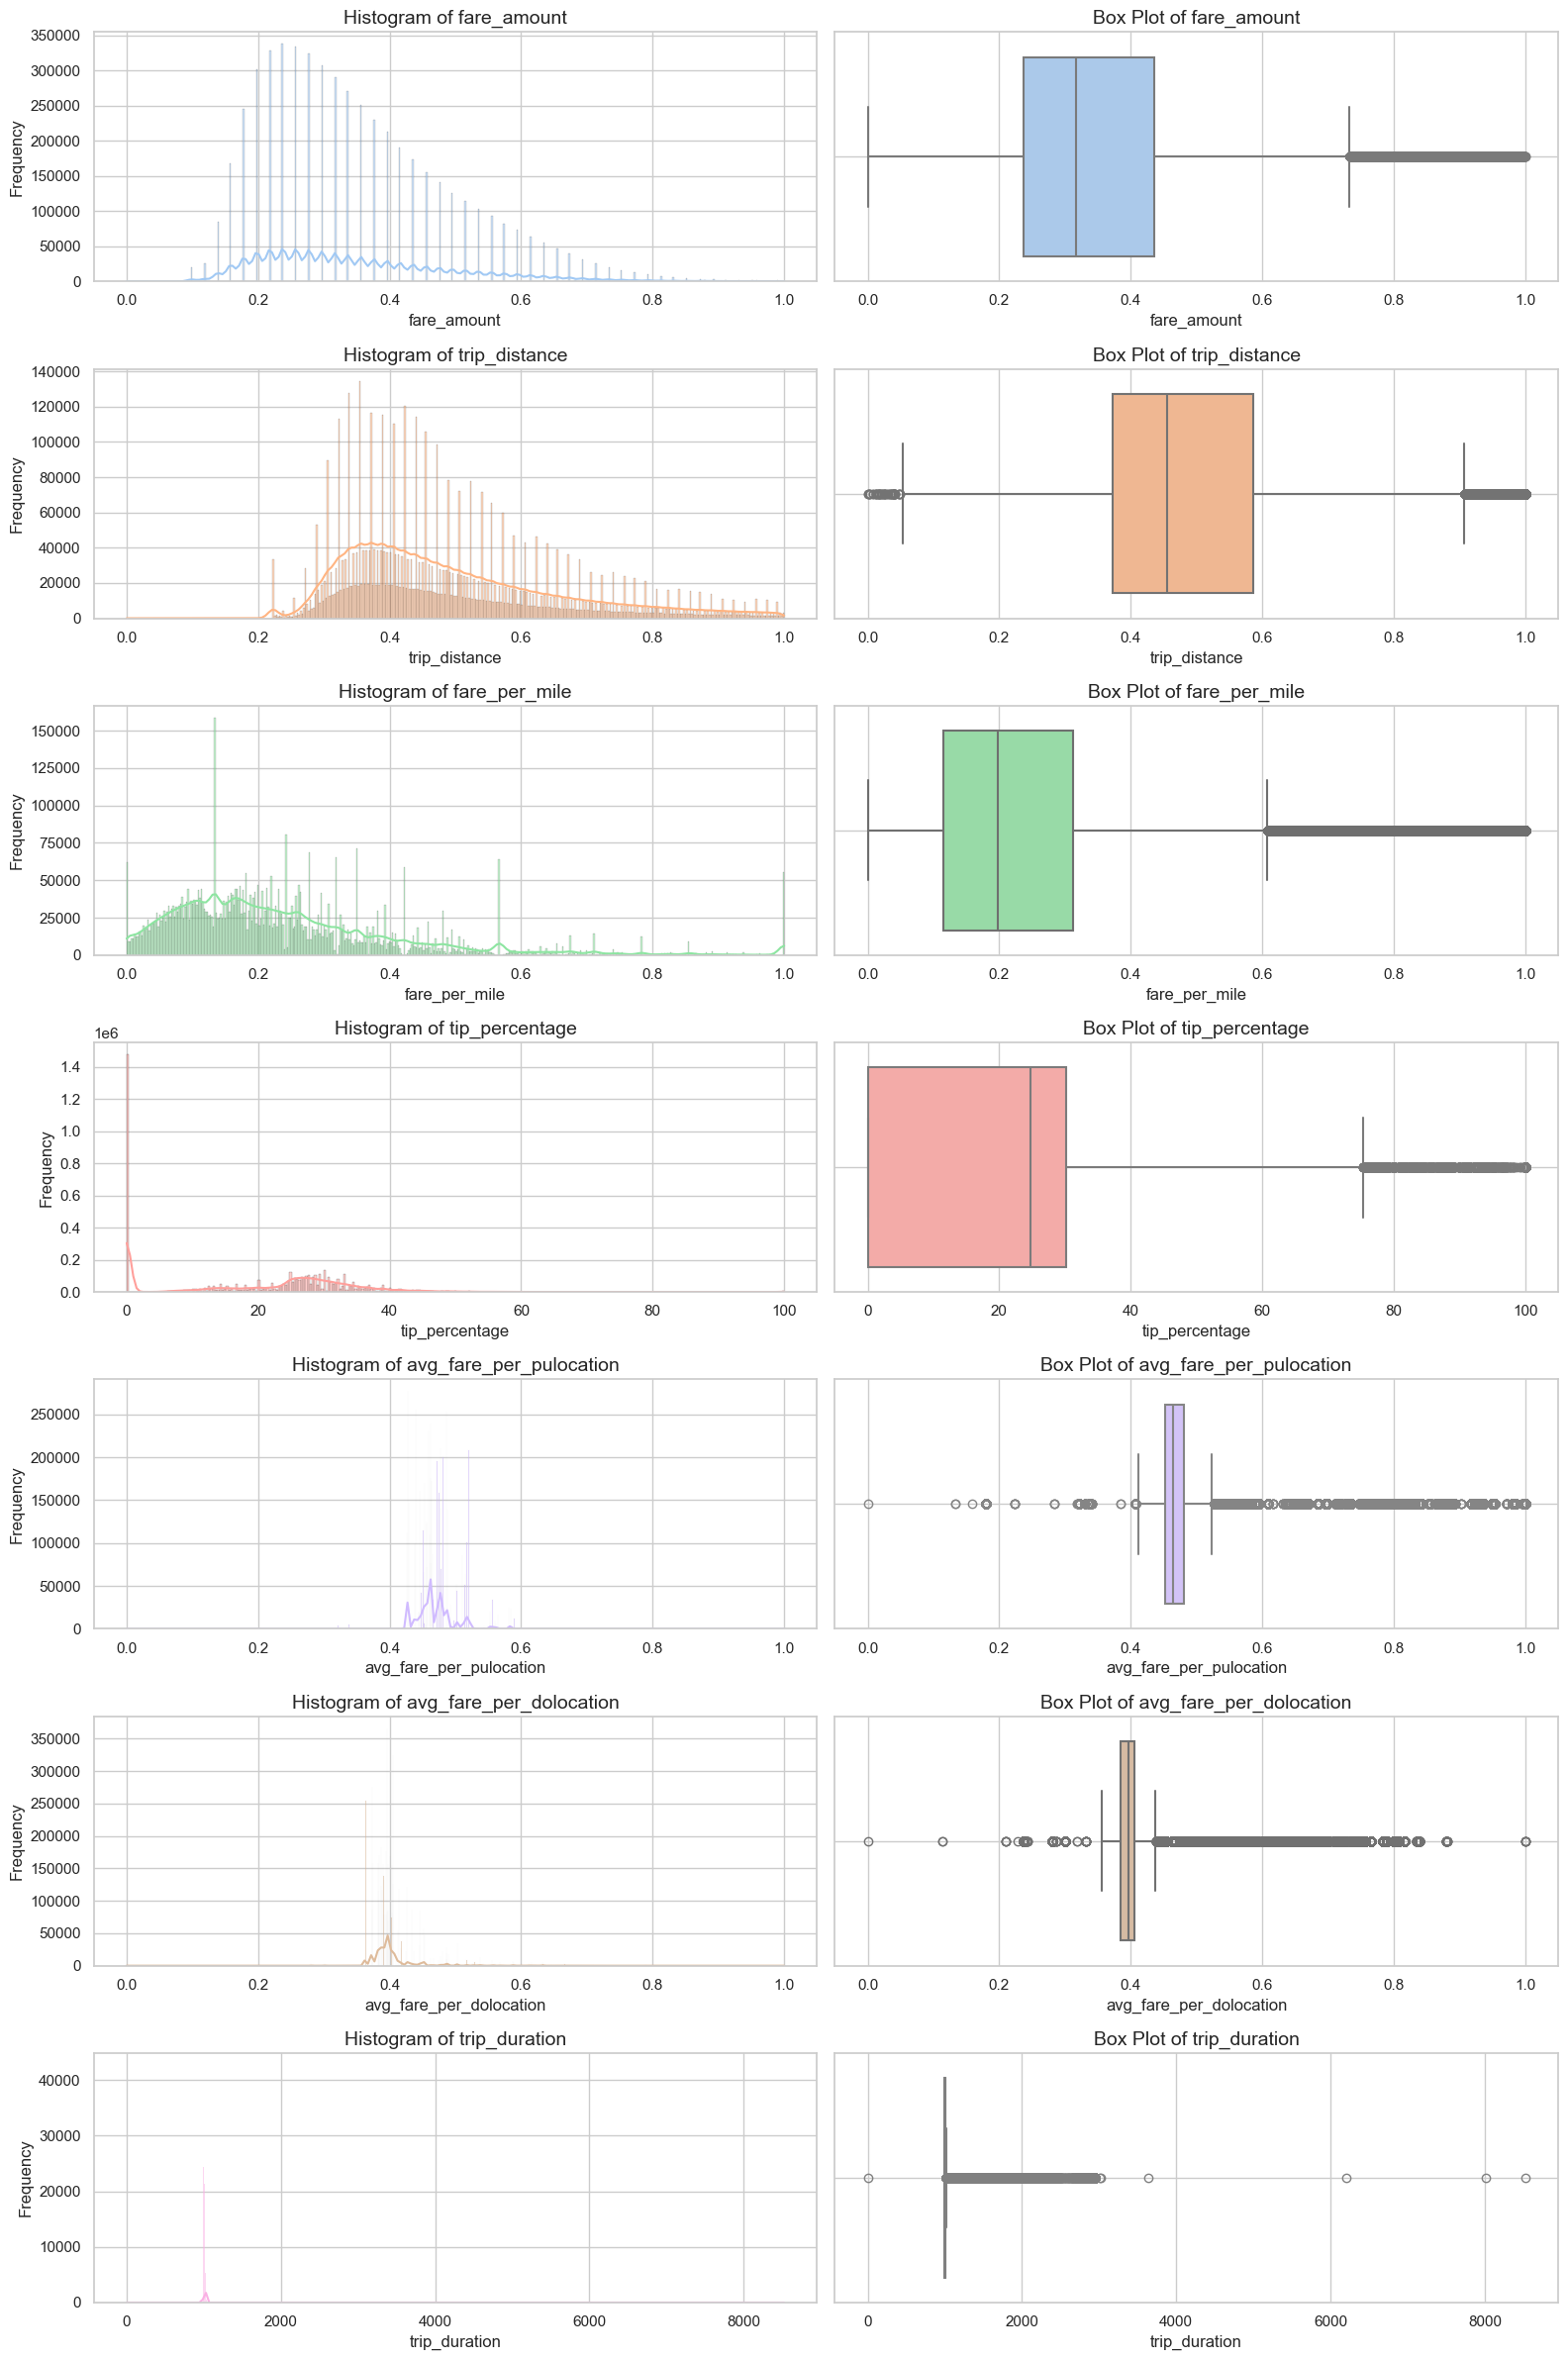

In [43]:
# Re-plotting the numerical columns data

numerical_columns = ['fare_amount', 'trip_distance', 'fare_per_mile', 'tip_percentage', 'avg_fare_per_pulocation', 'avg_fare_per_dolocation', 'trip_duration']

sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

plt.figure(figsize=(16, 24))
for i, col in enumerate(numerical_columns):
    # Histogram
    plt.subplot(len(numerical_columns), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, color=palette[i % len(palette)], edgecolor='black')
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    
    # Box plot
    plt.subplot(len(numerical_columns), 2, 2*i + 2)
    sns.boxplot(x=df[col], color=palette[i % len(palette)], linewidth=1.5)
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

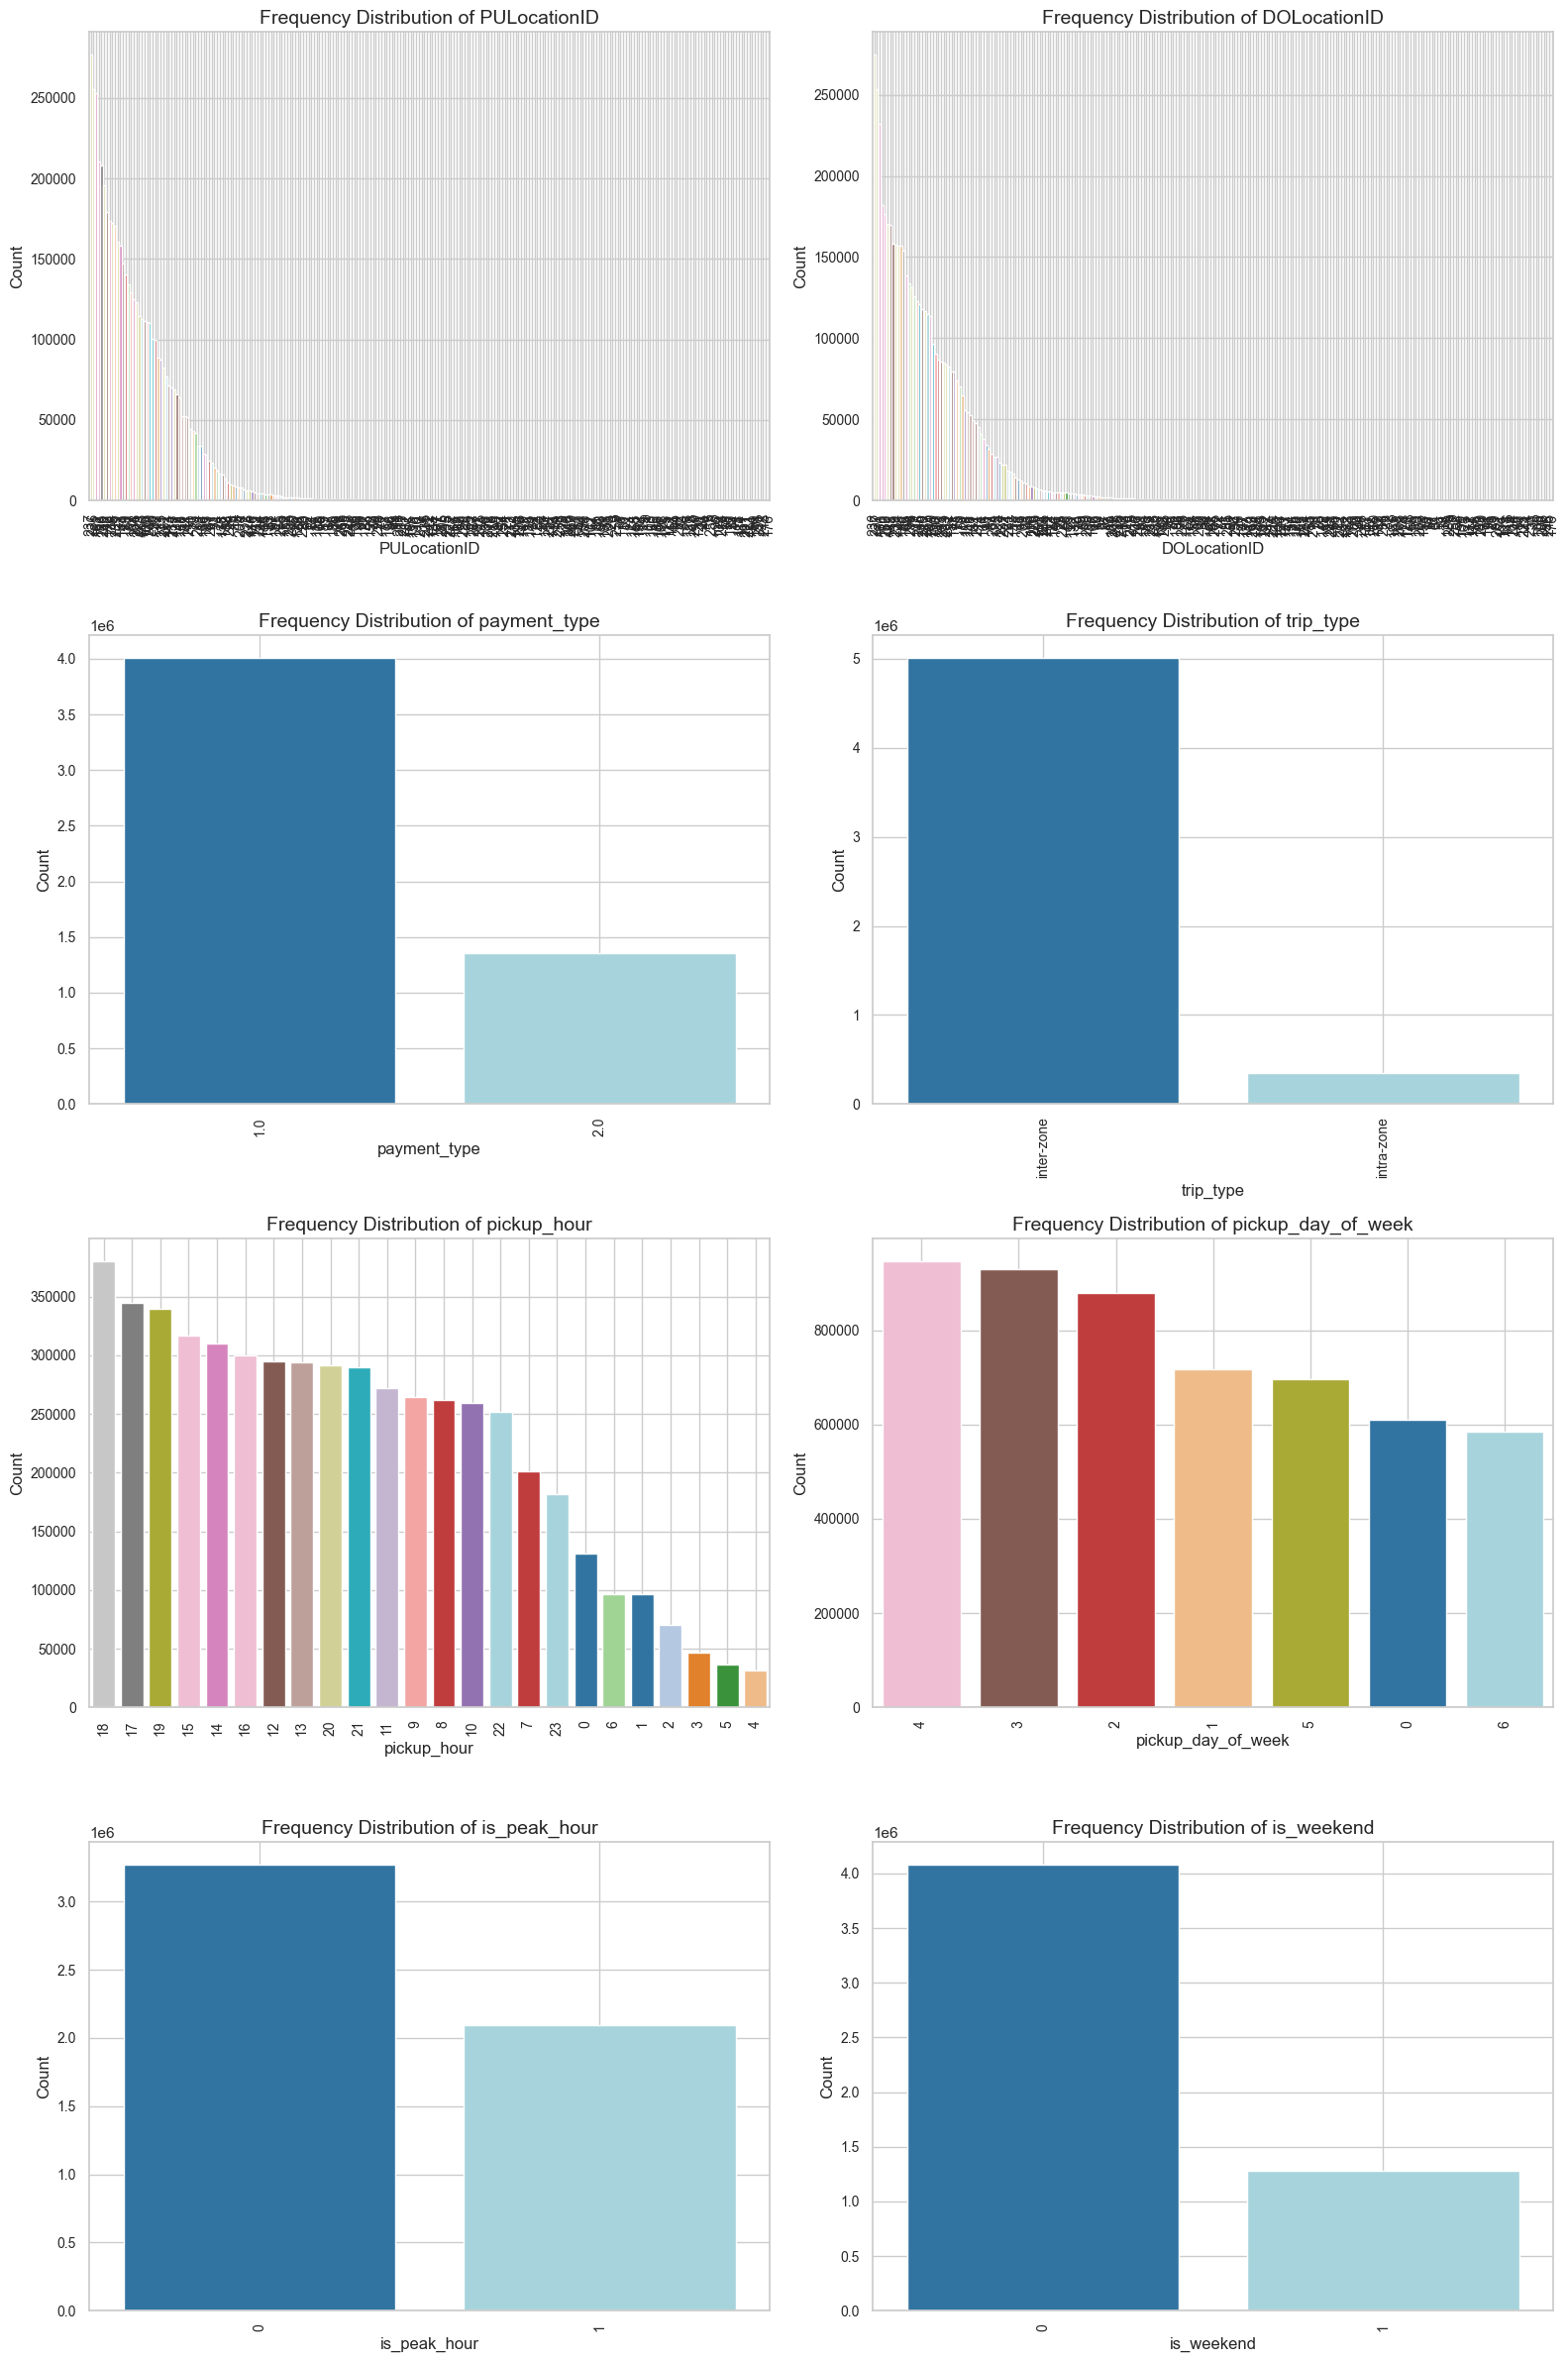

In [44]:
#Plotting for the categorical Values
sns.set(style="whitegrid")
plt.figure(figsize=(16, 24))
categorical_features = ['PULocationID', 'DOLocationID', 'payment_type', 'trip_type', 'pickup_hour', 'pickup_day_of_week', 'is_peak_hour', 'is_weekend']


for i, col in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)
    
    # Create a colormap for unique values
    num_unique_values = df1[col].nunique()
    colors = plt.cm.tab20(np.linspace(0, 1, num_unique_values)).tolist()
    
    # Create a temporary DataFrame to avoid issues with the hue parameter
    temp_df = df1[[col]].copy()
    temp_df['hue'] = temp_df[col]
    
    sns.countplot(x=col, data=temp_df, hue='hue', palette=colors, order=df1[col].value_counts().index, dodge=False, legend=False)
    plt.title(f'Frequency Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Looking at the most frequent Pick Up Locations ##

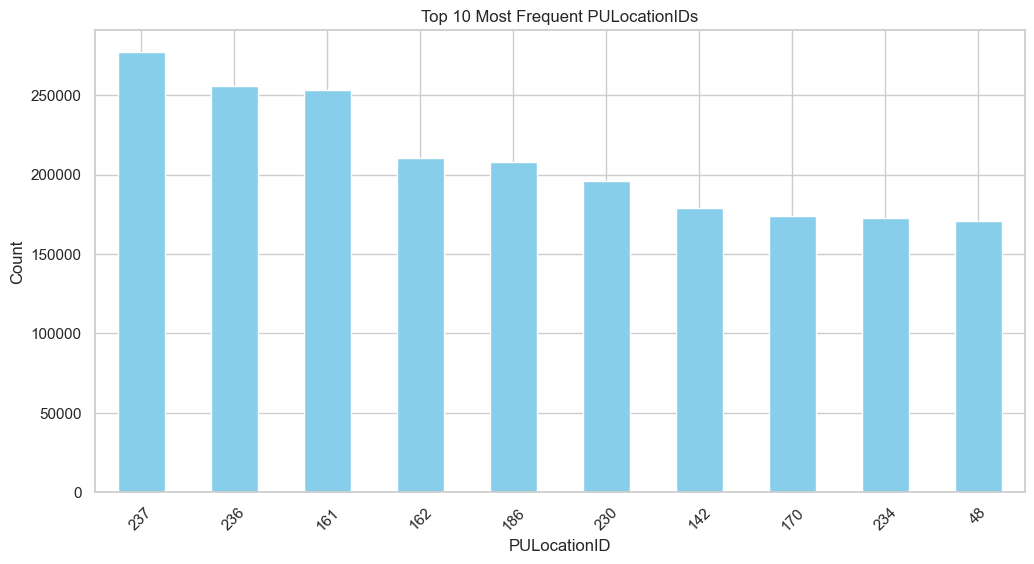

In [45]:
location_counts = df['PULocationID'].value_counts()
top_locations = location_counts.head(10)
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent PULocationIDs')
plt.xlabel('PULocationID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Looking at the most frequent Drop Off Locations ##

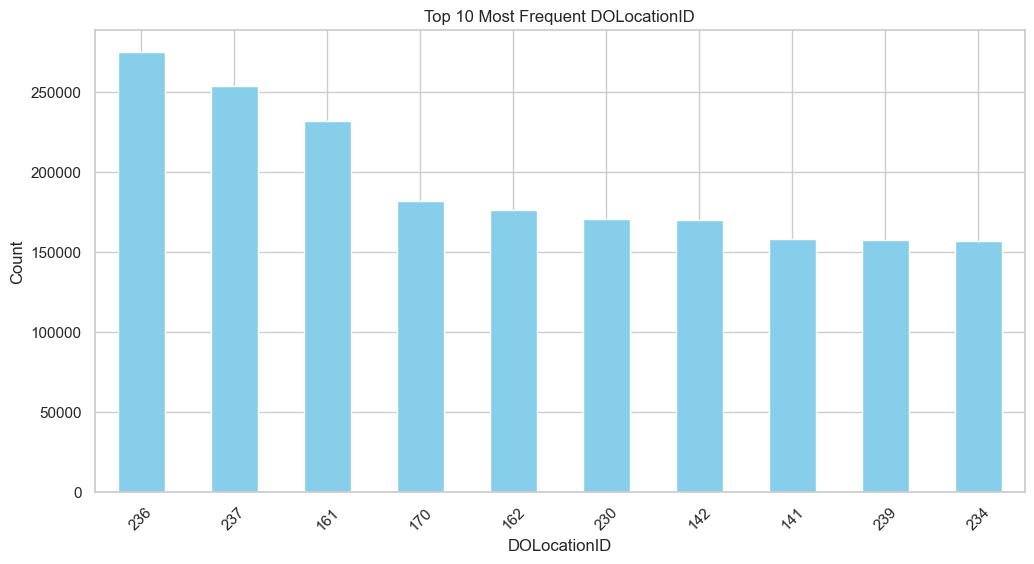

In [46]:
DOlocation_counts = df['DOLocationID'].value_counts()
top_locations = DOlocation_counts.head(10)
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent DOLocationID')
plt.xlabel('DOLocationID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Handling Skewness for Numerical Data ##

In [47]:
#Method 1 Using Log Transformations

df['log_trip_distance'] = np.log1p(df['trip_distance'])
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df['log_fare_amount'] = np.log1p(df['fare_amount'])
df['log_tip_amount'] = np.log1p(df['tip_amount'])

In [48]:
df['log_trip_distance'].value_counts()

log_trip_distance
0.316479    116560
0.304239    115989
0.328571    115245
0.291847    110410
0.340518    110365
             ...  
0.158672         1
0.090899         1
0.098492         1
0.144324         1
0.055209         1
Name: count, Length: 537, dtype: int64

#### Plotting the histogram and box plot to check the change made on the skewness after using Log transformation ####

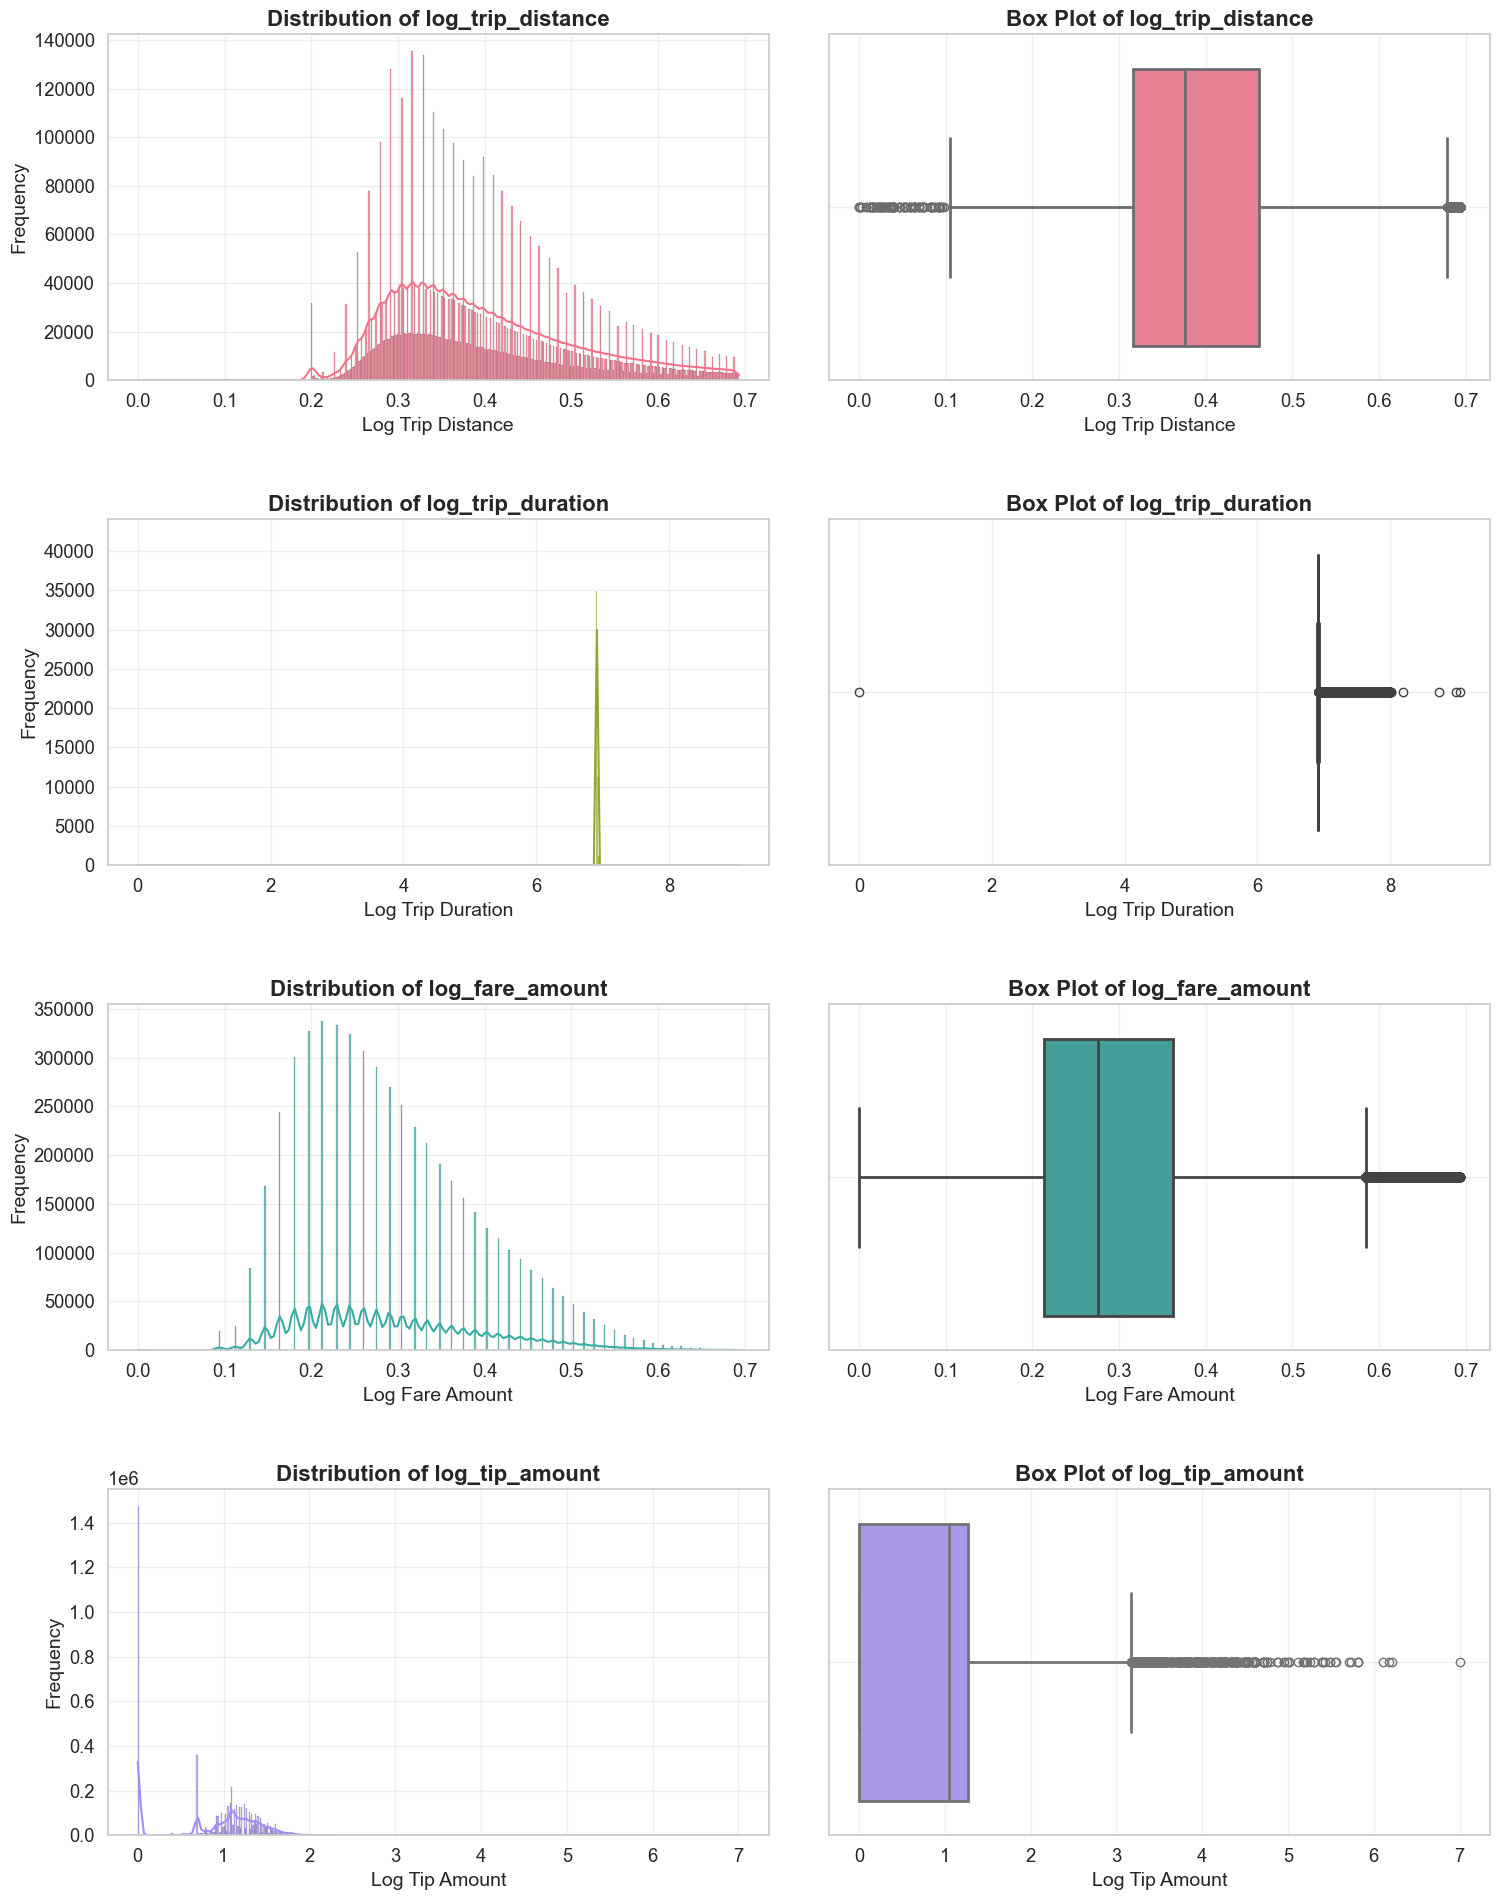

In [49]:
# Re-plotting the logarithmic columns data
log_columns = ['log_trip_distance', 'log_trip_duration', 'log_fare_amount', 'log_tip_amount']

sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("husl", n_colors=len(log_columns))
plt.figure(figsize=(16, 20))

for i, col in enumerate(log_columns):
    # Histogram
    plt.subplot(len(log_columns), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, color=palette[i], edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Box plot
    plt.subplot(len(log_columns), 2, 2*i + 2)
    sns.boxplot(x=df[col], color=palette[i], linewidth=2)
    plt.title(f'Box Plot of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col.replace('_', ' ').title(), fontsize=14)
    plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()

In [50]:
#Method 2 Using Box - Cox Transformation

df['boxcox_trip_distance'], _ = stats.boxcox(df['trip_distance'] + 1)
df['boxcox_trip_duration'], _ = stats.boxcox(df['trip_duration'] + 1)
df['boxcox_fare_amount'], _ = stats.boxcox(df['fare_amount'] + 1)
df['boxcox_tip_amount'], _ = stats.boxcox(df['tip_amount'] + 1)

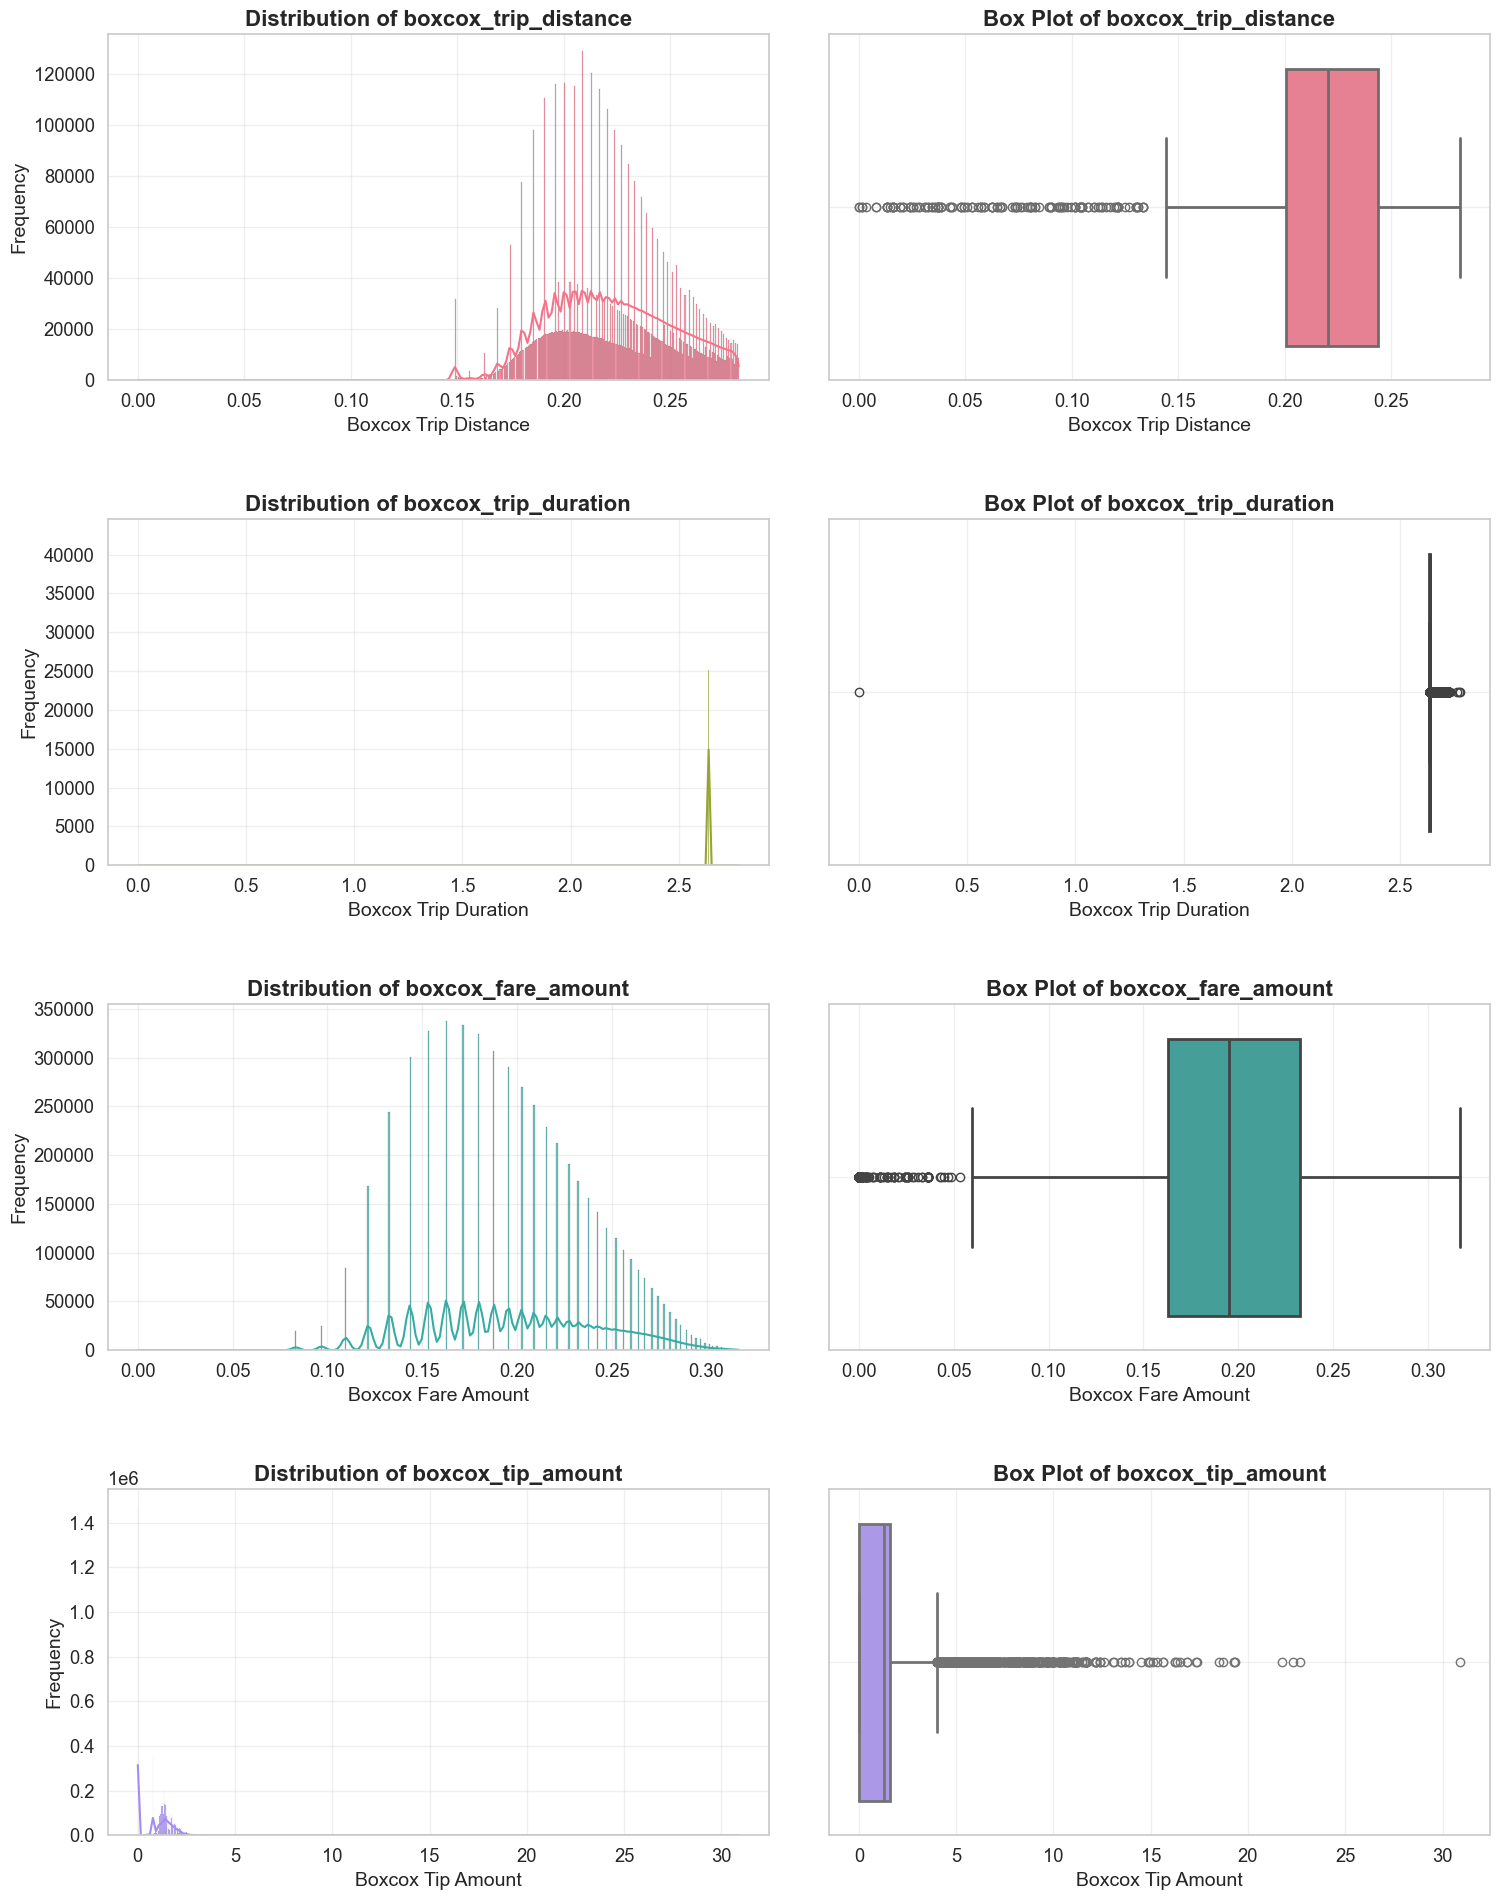

In [51]:
# Re-plotting the new transformed numerical columns data
boxcox_columns = ['boxcox_trip_distance', 'boxcox_trip_duration', 'boxcox_fare_amount', 'boxcox_tip_amount']

sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("husl", n_colors=len(boxcox_columns))
plt.figure(figsize=(16, 20))

for i, col in enumerate(boxcox_columns):
    # Histogram
    plt.subplot(len(boxcox_columns), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, color=palette[i], edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col.replace('_', ' ').title(), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, alpha=0.3)
    
    # Box plot
    plt.subplot(len(boxcox_columns), 2, 2*i + 2)
    sns.boxplot(x=df[col], color=palette[i], linewidth=2)
    plt.title(f'Box Plot of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col.replace('_', ' ').title(), fontsize=14)
    plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.show()

In [52]:
#Handling tip amount to look at non zero tips first creating a binary feature 1 if tip given 0 if not
df['tip_given'] = (df['tip_amount'] > 0).astype(int)
non_zero_tips = df[df['tip_amount'] > 0]['tip_amount']
non_zero_tips_boxcox, lambda_param = stats.boxcox(non_zero_tips)
df['tip_amount_transformed'] = np.zeros(len(df), dtype=np.float64) 

# Assign the transformed values to the non-zero tip rows
df.loc[df['tip_amount'] > 0, 'tip_amount_transformed'] = non_zero_tips_boxcox

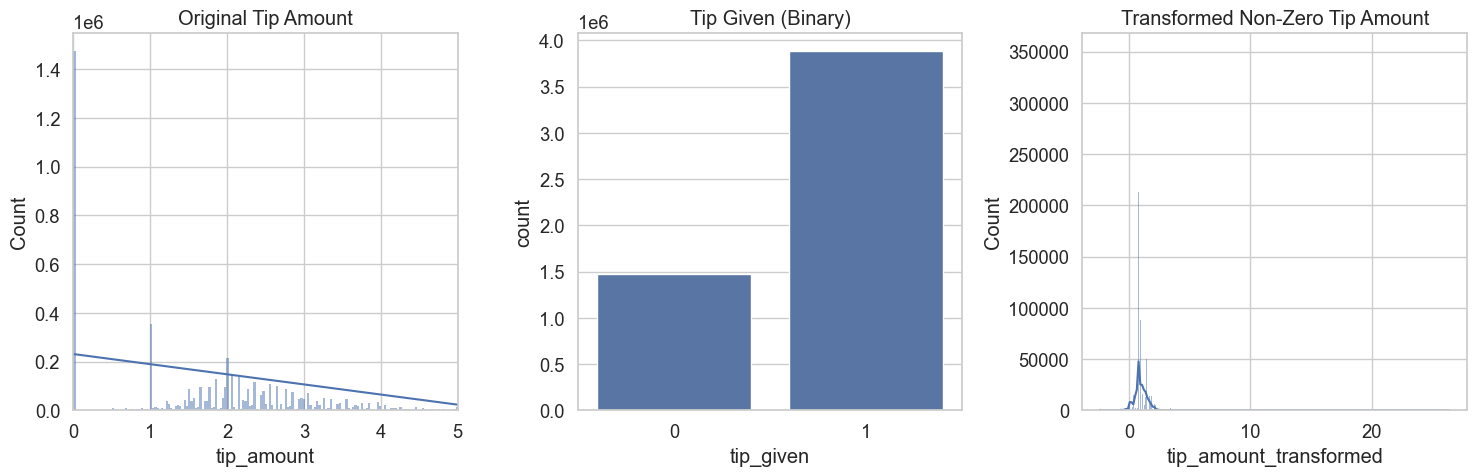

In [53]:
#Visualizing the newly transformed tips
plt.figure(figsize=(15, 5))

# Original tip amount distribution
plt.subplot(131)
sns.histplot(df['tip_amount'], kde=True)
plt.title('Original Tip Amount')
plt.xlim(0, df['tip_amount'].quantile(0.99))  # Limit x-axis to 99th percentile

# Binary tip given distribution
plt.subplot(132)
sns.countplot(x='tip_given', data=df)
plt.title('Tip Given (Binary)')

# Transformed non-zero tip amount distribution
plt.subplot(133)
sns.histplot(df[df['tip_amount'] > 0]['tip_amount_transformed'], kde=True)
plt.title('Transformed Non-Zero Tip Amount')

plt.tight_layout()
plt.show()

In [54]:
#Analyzing the results that we have gotten

# Summary statistics
print("Original Tip Amount:")
print(df['tip_amount'].describe())
print("\nTransformed Non-Zero Tip Amount:")
print(df[df['tip_amount'] > 0]['tip_amount_transformed'].describe())
print("\nTip Given (Binary):")
print(df['tip_given'].value_counts(normalize=True))

# Skewness before and after transformation
print("\nSkewness of original tip amount:", df['tip_amount'].skew())
print("Skewness of transformed non-zero tip amount:", 
      df[df['tip_amount'] > 0]['tip_amount_transformed'].skew())

Original Tip Amount:
count    5.361469e+06
mean     1.700632e+00
std      1.658751e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.850000e+00
75%      2.560000e+00
max      1.100000e+03
Name: tip_amount, dtype: float64

Transformed Non-Zero Tip Amount:
count    3.889024e+06
mean     8.928136e-01
std      5.768308e-01
min     -2.404269e+00
25%      5.503946e-01
50%      8.736993e-01
75%      1.249878e+00
max      2.639998e+01
Name: tip_amount_transformed, dtype: float64

Tip Given (Binary):
tip_given
1    0.725365
0    0.274635
Name: proportion, dtype: float64

Skewness of original tip amount: 85.77930055088615
Skewness of transformed non-zero tip amount: 0.2787107507044742


## Bivariate Analysis of Numerical Data ##

In [55]:
dft = df[df['tip_given'] == 1]

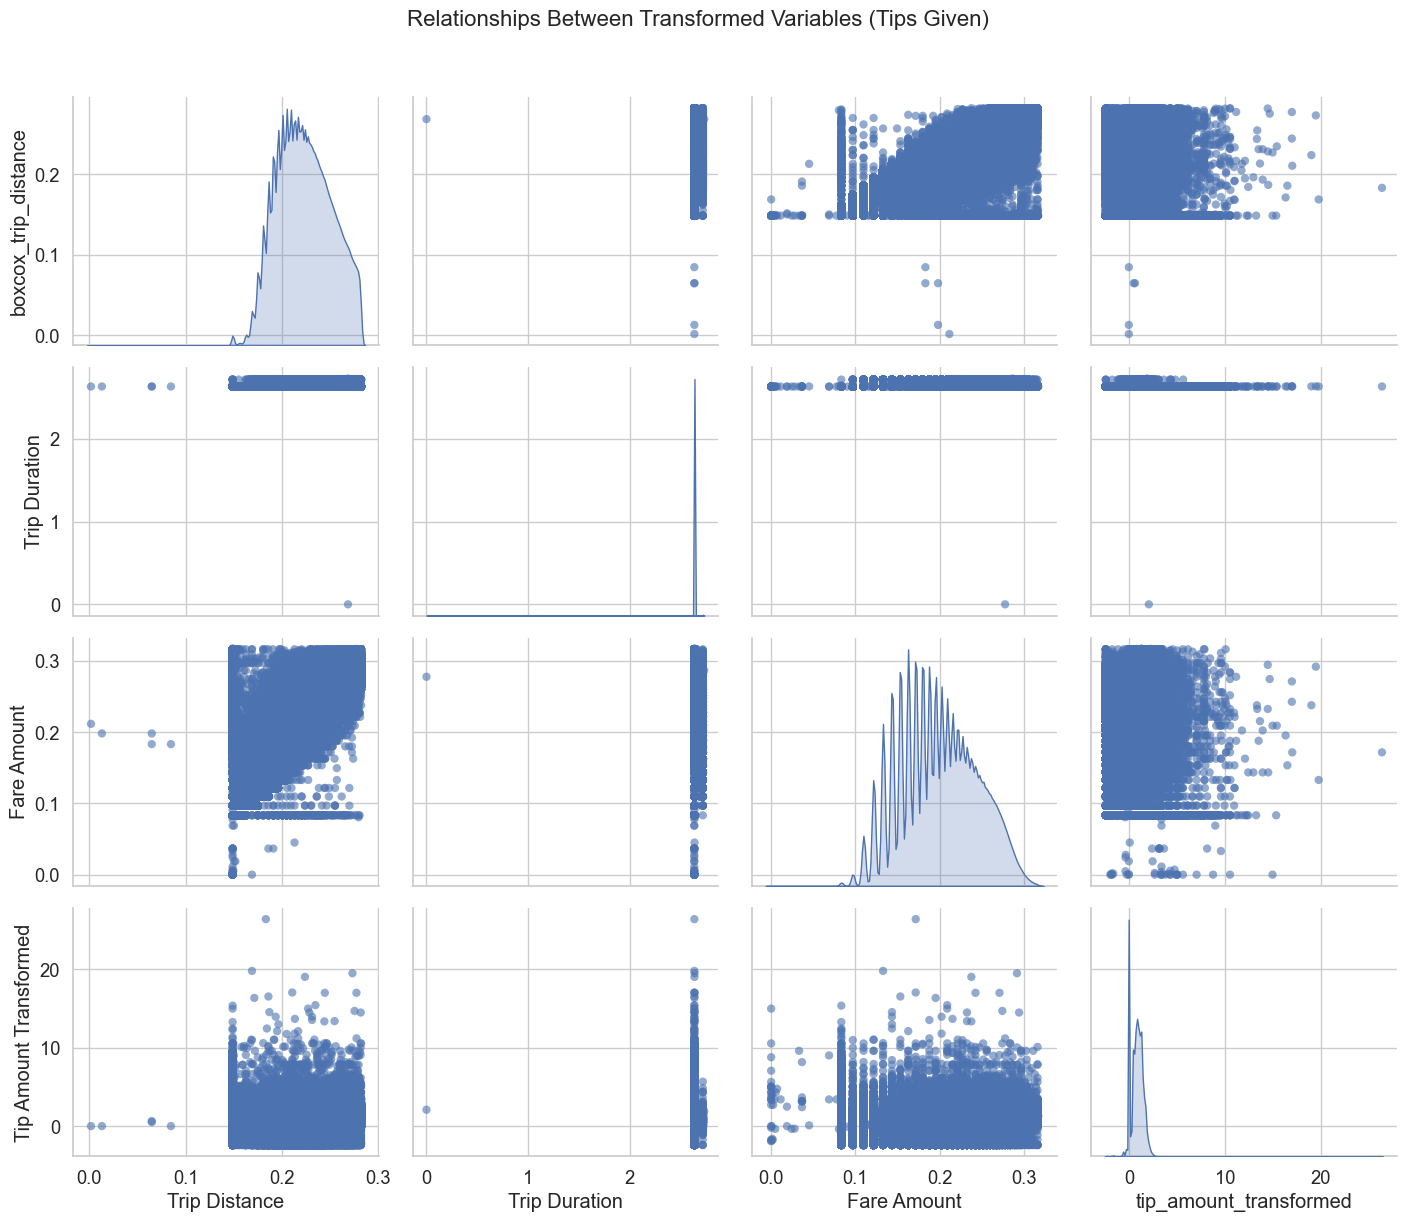

In [58]:
#This is the scatter plot for when the tip is given, looking at the tip amount
features = ['boxcox_trip_distance', 'boxcox_trip_duration', 'boxcox_fare_amount', 'tip_amount_transformed']

#Customizing the pallete
g = sns.pairplot(dft[features], 
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 'edgecolor': 'none'},
                 diag_kws={'fill': True},  
                 height=3,
                 aspect=1.2)
# Customize the plot
g.fig.suptitle('Relationships Between Transformed Variables (Tips Given)', y=1.02, fontsize=16)
#Labels for each plot
for i, var in enumerate(features):
    for j, var2 in enumerate(features):
        if i != j:
            g.axes[i, j].set_xlabel(var2.replace('boxcox_', '').replace('_', ' ').title())
            g.axes[i, j].set_ylabel(var.replace('boxcox_', '').replace('_', ' ').title())
plt.tight_layout()
plt.show()

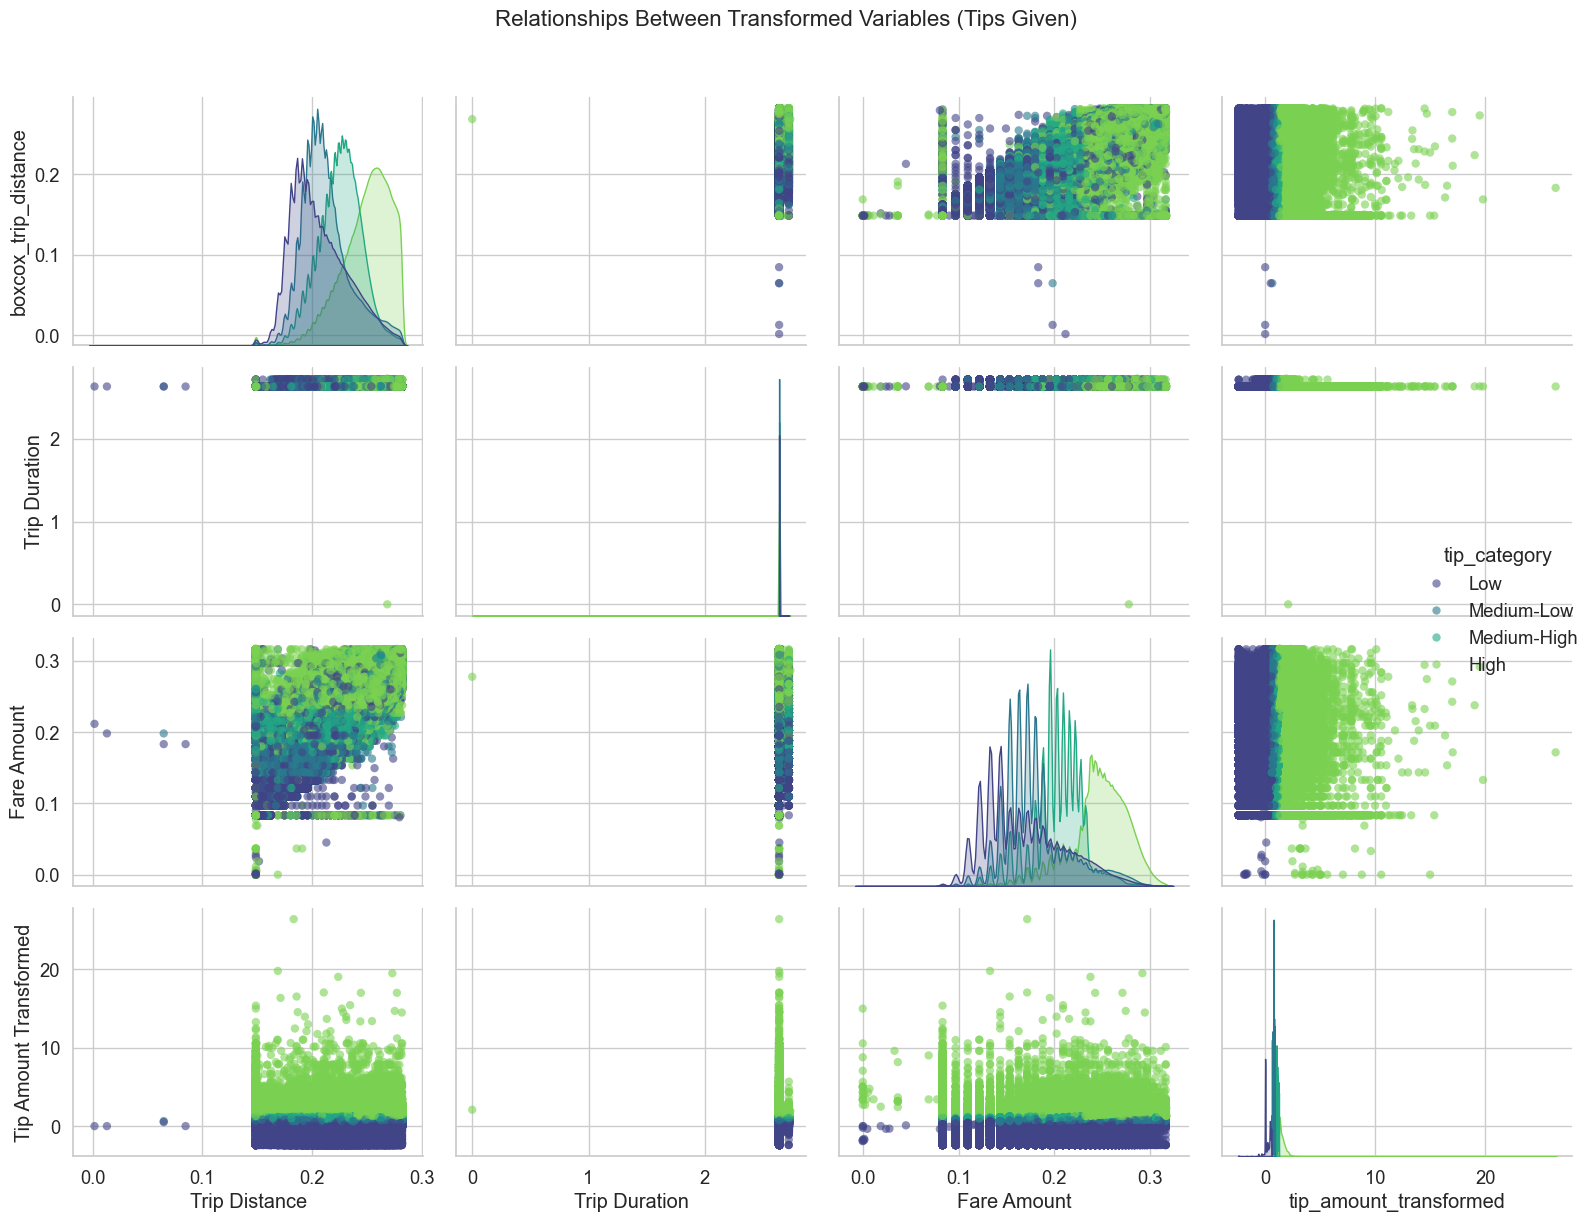

In [59]:
#Plotting according to the tip size and categorising according to the tip amount

# Filter for trips where tips are given
dft = df[df['tip_given'] == 1].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Create tip categories for hue
dft['tip_category'] = pd.qcut(dft['tip_amount_transformed'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create a custom color palette
custom_palette = sns.color_palette("viridis", n_colors=4)

# Create the pairplot with updated parameters
g = sns.pairplot(dft[features + ['tip_category']], 
                 hue='tip_category',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 'edgecolor': 'none'},
                 diag_kws={'fill': True},
                 palette=custom_palette,
                 height=3,
                 aspect=1.2)

# Customize the plot
g.fig.suptitle('Relationships Between Transformed Variables (Tips Given)', y=1.02, fontsize=16)
for i, var in enumerate(features):
    for j, var2 in enumerate(features):
        if i != j:
            g.axes[i, j].set_xlabel(var2.replace('boxcox_', '').replace('_', ' ').title())
            g.axes[i, j].set_ylabel(var.replace('boxcox_', '').replace('_', ' ').title())

plt.tight_layout()
plt.show()